## Great Circle Calculation

Overview:
- [x] [gc_onarc](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_onarc.shtml):  Determines if a point on the globe lies on a specified great circle arc (uxarray, and potentially with tolerance)
- [x] [gc_latlon](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_latlon.shtml): Finds the great circle distance (true surface distance) between two points on the globe and interpolates points along the great circle (geopy and pyproj)
- [x] [gc_pnt2gc](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_pnt2gc.shtml):  Finds the angular distance from a point to a great circle  (cross-track distance)
- [x] [gc_aangle](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_aangle.shtml):  Finds the acute angle between two great circles on the globe (normals and dot product) 
- [x] [gc_dangle](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_dangle.shtml):  Finds the directed angle between two great circles having a specified intersection point (inverse of z cross product AB/AC)
- [x] [gc_clkwise](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_clkwise.shtml):  Tests clockwise/counterclockwise ordering of points on spherical polygon (shoelace formula)
- [x] [gc_inout](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_inout.shtml):  Determines if a list of lat/lon specified points are inside or outside of spherical lat/lon polygon(s) (shapley)
- [x] [gc_qarea](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_qarea.shtml):  Finds the area of a quadrilateral patch on the unit sphere (geod)
- [x] [gc_tarea](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_tarea.shtml):  Finds the area of a triangular patch on the unit sphere (geod)

> A great circle is a section of a sphere that contains a diamter of the sphere...A great circle becomes a straight line in a gnomoni c projection
> To find the great circle (geodesic) distance between two points located at latitude `delta` and longitude `lambda` of (delta_1, lamba_1) and (delta_2, lambda_2) on a sphere of radius a

[Wolfram MathWorld](https://mathworld.wolfram.com/GreatCircle.html)

1. Convert spherical coordinates to Cartesian coordinates using:

```
        | cos(lambda_i) * cos(delta_i) |
r_i = a | sin(lambda_i) * cos(delta_i) |
        |        sin(delta_i)          |
```
2. Find the angle `alpha` between r1 and r2 using the dot product
```
cos(alpha) = r_1_hat * r_2_hat
cos(alpha) = cos(delta_1) * cos(delta_2) * cos(lambda_1 - lambda_2) + sin(delta_1) * sin(delta_2)
```
3. The great circle distance is then: where a = 6378 km
```
d = a * cos^-1[cos(delta_1) * cos(delta_2) * cos(lambda_1 - lambda_2) + sin(delta_1) * sin(delta_2)]
```

In [1015]:
import numpy as np

In [1016]:
earth_radius = 6378137  # meters

# Based on WSG-84: https://gscommunitycodes.usf.edu/geoscicommunitycodes/public/geophysics/Gravity/earth_shape.php

## Cartesian Coordinates

Cartesian coordinates describe points in space based on perpendicular axis lines that meet at a singlle point of orign, where any point's position is described based on the distance to the orgin along xyz axis

## Spherical Coordinates

Spherical coordinates describe points in space based on three values: radial distance (rho, r) along the radial line between point and the origin, polar angle (theta, θ) between the radial line and the polar axis, and azimuth angle (phi, φ) which is the angle of rotation of the radial line around the polar axis. With a fixed radius, the 3-point coordinates (r, θ, φ) provide a coordiante along a sphere

- Radial distance: distance from center to surface of sphere
- Polar angle: angle between radial line and polar axis
- Azimuth angle: angle around polar axis

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Sphericalcoordinates.svg/1024px-Sphericalcoordinates.svg.png" alt="Spherical Coordinate Description from Wikipedia" width=400 />
</p>

## Polar Coordinates

TODO

In [1017]:
def latlon_to_cartesian_coords(latitude=None, longitude=None, radius=None):
    cart_x = radius * np.cos(np.deg2rad(latitude)) * np.cos(np.deg2rad(longitude))
    cart_y = radius * np.cos(np.deg2rad(latitude)) * np.sin(np.deg2rad(longitude))
    cart_z = radius * np.sin(np.deg2rad(latitude))
    return cart_x, cart_y, cart_z

In [1018]:
# https://math.libretexts.org/Courses/Mount_Royal_University/MATH_2200%3A_Calculus_for_Scientists_II/7%3A_Vector_Spaces/5.7%3A_Cylindrical_and_Spherical_Coordinates
def cartestian_to_spherical(cart_x, cart_y, cart_z):
    # Convert from rectangular coordinates to spherical coordinates
    rho = np.sqrt(cart_x**2 + cart_y**2 + cart_z**2)
    theta = np.arctan(cart_y/cart_x)
    phi = np.arccos(cart_z / rho)
    return rho, theta, phi    

In [1019]:
def latlon_to_polar(latitude=None, longitude=None):
    x = np.cos(np.deg2rad(latitude)) * np.sin(np.deg2rad(longitude))
    y = np.cos(np.deg2rad(latitude)) * np.cos(np.deg2rad(longitude))
    z = np.sin(np.deg2rad(latitude))
    return x, y, z

https://www.nosco.ch/mathematics/en/great-circle.php

In [1020]:
## Return spherical and cartesian coordiantes dictionary for a new point
def return_all_coords(latitude=None, longitude=None):
    new_coords_dict = {"latitude": latitude, "longitude": longitude}
    cart_x, cart_y, cart_z = latlon_to_cartesian_coords(latitude, longitude, earth_radius)
    new_coords_dict["cart_x"] = cart_x
    new_coords_dict["cart_y"] = cart_y
    new_coords_dict["cart_z"] = cart_z
    rho, theta, phi = cartestian_to_spherical(new_coords_dict["cart_x"], new_coords_dict["cart_y"], new_coords_dict["cart_z"])
    new_coords_dict["rho"] = rho
    new_coords_dict["theta"] = theta
    new_coords_dict["phi"] = phi
    polar_x, polar_y, polar_z = latlon_to_polar(latitude, longitude)
    new_coords_dict["polar_x"] = polar_x
    new_coords_dict["polar_y"] = polar_y
    new_coords_dict["polar_z"] = polar_z
    return new_coords_dict

In [1021]:
# Two Points to Create Arc from Boulder -> Boston
boulder_lat = 40.0150
boulder_lon = -105.2705
boston_lat = 42.3601
boston_lon = -71.0589

boulder_coords = return_all_coords(boulder_lat, boulder_lon)
boston_coords = return_all_coords(boston_lat, boston_lon)

## gc_onarc: Determines if a point on the globe lies on a specified great circle arc

In [1022]:
# pip install uxarray
# pip install shapely
# pip install Pillow
# pip install pyparsing
# pip install kiwisolver
# pip install dask
# python -m pip install "dask[dataframe]"
# pip install fsspec
import uxarray as ux

``
uxarray.grid.arcs.point_within_gca(pt, gca_cart, is_directed=False)
``
- pt (numpy.ndarray (float)) – Cartesian coordinates of the point
- gca_cart (numpy.ndarray of shape (2, 3), (np.float or gmpy2.mpfr)) – Cartesian coordinates of the Great Circle Arc (GCR).

### Great Circle Arc

In [1023]:
# Great Circle Arc formed by cartesian coordinates of two points (Boulder -> Boston)
boulder_point = np.array([boulder_coords["cart_x"], boulder_coords["cart_y"], boulder_coords["cart_z"]])
boston_point = np.array([boston_coords["cart_x"], boston_coords["cart_y"], boston_coords["cart_z"]])

great_circle_arc = np.array([boulder_point, boston_point])
print(great_circle_arc.shape)
great_circle_arc

(2, 3)


array([[-1286557.56698561, -4712393.80199174,  4101066.43113116],
       [ 1529808.95890095, -4457769.25096357,  4297512.00640546]])

### Point along the great circle arc from Boulder to Boston: Cloverdale
## TODO: CHECK OUTPUTS
Arc determined via [great circle map](https://www.greatcirclemap.com/roadmap?routes=DEN-BOS) between DIA and Logan Airport

In [1024]:
# Point along the great circle arc: Cloverdale
cloverdale_lat = 38.8055
cloverdale_lon = -123.0172
cloverdale_coords = return_all_coords(cloverdale_lat, cloverdale_lon)
point_on_arc = np.array([cloverdale_coords["cart_x"], cloverdale_coords["cart_y"], cloverdale_coords["cart_z"]])
point_on_arc

array([-2708292.77324632, -4167665.57825366,  3997042.09047019])

In [1025]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc)
print(f"Does the point lie on the great circle = {does_point_lie_on_arc}")

Does the point lie on the great circle = False


### Point NOT along the great circle arc from Boulder to Boston: Wichita  

In [1026]:
### Point NOT along the great circle arc: Wichita
wichita_lat = 37.6872
wichita_lon = -97.3301
wichita_coords = return_all_coords(wichita_lat, wichita_lon)
point_on_arc = np.array([wichita_coords["cart_x"], wichita_coords["cart_y"], wichita_coords["cart_z"]])
point_on_arc

array([ -643976.36981196, -5006153.68763072,  3899275.73809728])

In [1027]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc)
print(f"Does the point lie on the great circle = {does_point_lie_on_arc}")

Does the point lie on the great circle = False


### Point ALMOST along the great circle arc from Boulder to Boston: Omaha   

In [1028]:
# Point NOT along the great circle arc: Omaha
omaha_lat = 37.6872
omaha_lon = -97.3301
omaha_coords = return_all_coords(omaha_lat, omaha_lon)
point_on_arc = np.array([omaha_coords["cart_x"], omaha_coords["cart_y"], omaha_coords["cart_z"]])
point_on_arc

array([ -643976.36981196, -5006153.68763072,  3899275.73809728])

In [1029]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc)
print(f"Does the point lie on the great circle = {does_point_lie_on_arc}")

Does the point lie on the great circle = False


### Point along the great circle arc from (Reversed) Boulder to Boston: Basalt

In [1030]:
# Point along the reversed great circle arc: Basalt
basalt_lat = 39.3725
basalt_lon = -107.0785
basalt_coords = return_all_coords(basalt_lat, basalt_lon)
point_on_arc = np.array([basalt_coords["cart_x"], basalt_coords["cart_y"], basalt_coords["cart_z"]])
point_on_arc

array([-1448010.02528173, -4713122.36485975,  4046032.14659887])

In [1031]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc, is_directed=False)
print(f"Does the point lie on the great circle (directed) = {does_point_lie_on_arc}")

Does the point lie on the great circle (directed) = False


In [1032]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc, is_directed=True)
print(f"Does the point lie on the great circle (undirected) = {does_point_lie_on_arc}")

Does the point lie on the great circle (undirected) = False


## gc_latlon: Finds the great circle distance (true surface distance) between two points on the globe and interpolates points along the great circle. 

In [1033]:
from pyproj import Geod
geodesic = Geod(ellps="WGS84")

In [1034]:
foward_bearing, reverse_bearing, distance_meter =  geodesic.inv(boulder_coords["longitude"],
                                                    boulder_coords["latitude"],
                                                    boston_coords["longitude"],
                                                    boston_coords["latitude"])

In [1035]:
print(f"Distance between coordinates = {distance_meter/1000} km")

Distance between coordinates = 2862.597479914522 km


### Foward Bearing: direction towards the next point

### Two version: 
- interpolate with N total equally spaced number of points
- interpolate every N meters

In [1036]:
import geopy.distance

def interpolate_points_along_gc(lat_start,
                                lon_start,
                                lat_end,
                                lon_end,
                                distance_between_points_meter): 
    lat_lon_points = [(lat_start, lon_start)]
    
    # move to next point when distance between points is less than the equal distance
    move_to_next_point = True
    while(move_to_next_point):
        forward_bearing, reverse_bearing, distance_meters = geodesic.inv(lon_start,
                                                                         lat_start, 
                                                                         lon_end,
                                                                         lat_end)
        if distance_meters < distance_between_points_meter:
            # ends before overshooting
            move_to_next_point = False
        else:
            start_point = geopy.Point(lat_start, lon_start)
            distance_to_move = geopy.distance.distance(
                            kilometers=distance_between_points_meter /
                            1000)  # distance to move towards the next point
            final_position = distance_to_move.destination(
                            start_point, bearing=forward_bearing)
            lat_lon_points.append((final_position.latitude, final_position.longitude))
            # new starting position is newly found end position
            lon_start, lat_start = final_position.longitude, final_position.latitude
    lat_lon_points.append((lat_end, lon_end))
    return lat_lon_points

### 1.) Interpolate with _N_ Total Equally Spaced Points

In [1037]:
n_total_points = 10 # total points (n points)

distance_between_points_meter = distance_meter / (n_total_points + 1)
print(f"Each point will be seperated by {distance_between_points_meter} meters ({distance_between_points_meter/1000} km)")

Each point will be seperated by 260236.1345376838 meters (260.2361345376838 km)


In [1038]:
lat_start, lon_start = boulder_coords["latitude"], boulder_coords["longitude"]
lat_end, lon_end = boston_coords["latitude"], boston_coords["longitude"]

every_n_pts = interpolate_points_along_gc(lat_start,
                                          lon_start,
                                          lat_end,
                                          lon_end,
                                          distance_between_points_meter)
print(f"{len(every_n_pts)} Total Points")
every_n_pts

12 Total Points


[(40.015, -105.2705),
 (40.64283438472448, -102.32002071588883),
 (41.19386139956729, -99.31719425393653),
 (41.665293789240074, -96.2672998277903),
 (42.054648659580415, -93.17653047007545),
 (42.35980367525436, -90.05192021556941),
 (42.57904824130258, -86.90123344627509),
 (42.711126897374584, -83.73281874084785),
 (42.75527239726805, -80.55543262504408),
 (42.71122644219359, -77.37804142647052),
 (42.57924674954763, -74.20961159223958),
 (42.3601, -71.0589)]

### 2.) Interpolate every N meters

In [1039]:
distance_between_points_meter = 112351
print(f"Each point will be seperated by {distance_between_points_meter} meters ({distance_between_points_meter/1000} km)")

Each point will be seperated by 112351 meters (112.351 km)


In [1040]:
lat_start, lon_start = boulder_coords["latitude"], boulder_coords["longitude"]
lat_end, lon_end = boston_coords["latitude"], boston_coords["longitude"]

every_n_meters_pts = interpolate_points_along_gc(lat_start,
                                          lon_start,
                                          lat_end,
                                          lon_end,
                                          distance_between_points_meter)
print(f"{len(every_n_meters_pts)} Total Points")
every_n_meters_pts

27 Total Points


[(40.015, -105.2705),
 (40.29528549842406, -104.00341905484422),
 (40.561568665751025, -102.72608862554382),
 (40.81360756969855, -101.43886851868436),
 (41.05116853963942, -100.14215175538928),
 (41.274027051903765, -98.83636427179823),
 (41.481968612808345, -97.52196438787591),
 (41.67478963217906, -96.19944203574401),
 (41.85229827978712, -94.86931774153358),
 (42.01431531687306, -93.53214135788726),
 (42.16067489479776, -92.1884905476517),
 (42.291225312847395, -90.8389690229252),
 (42.40582972733871, -89.48420454739188),
 (42.50436680442648, -88.12484671369435),
 (42.58673130941052, -86.76156451138083),
 (42.652834625871606, -85.39504370461206),
 (42.702605198629755, -84.02598404223001),
 (42.735988895304544, -82.65509632587766),
 (42.75294928215213, -81.28309936452901),
 (42.75346781084072, -79.91071684595877),
 (42.73754391388529, -78.53867415728898),
 (42.70519500757115, -77.16769518774228),
 (42.65645640233027, -75.79849914708072),
 (42.591381121670025, -74.43179743290122),
 (

### Plot N Total Points and Set Distance Apart

Compare to the [Great Circle Map](https://www.greatcirclemap.com/satellite?routes=DEN-BOS) (DIA to Logan Airport, instead of Boulder to Boston)

In [1041]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeature

In [1042]:
def plot_coordinate(lst_of_coords=None, title=None):
    #plt.style.use('dark_background')
    # Set up world map plot
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    lon_west, lon_east, lat_south, lat_north = -130, -60, 20, 60
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.STATES, edgecolor="black")
    
    # Plot Latitude/Longitude Location
    longitudes = [x[1] for x in lst_of_coords] # longitude
    latitudes = [x[0] for x in lst_of_coords] # latitude
    plt.plot(longitudes, latitudes)
    plt.scatter(longitudes, latitudes)
    
    # Setup Axis Limits and Title/Labels
    plt.title(title)
    #plt.xlabel("Longitude (Degrees)")
    #plt.ylabel("Latitude (Degrees)")
    plt.show()

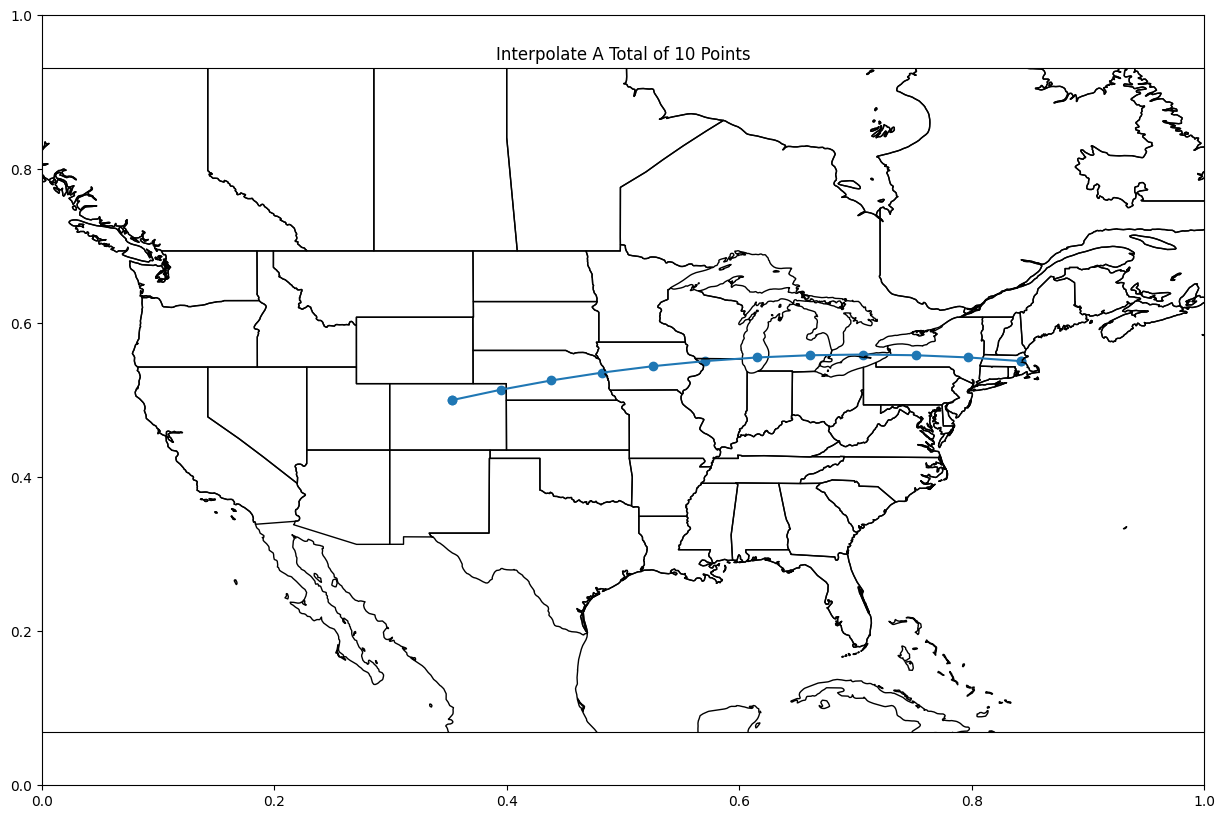

In [1043]:
every_n_with_start_end = [(boulder_coords["latitude"], boulder_coords["longitude"])] + every_n_pts + [(boston_coords["latitude"],boston_coords["longitude"])]
plot_coordinate(every_n_with_start_end, f"Interpolate A Total of {n_total_points} Points")

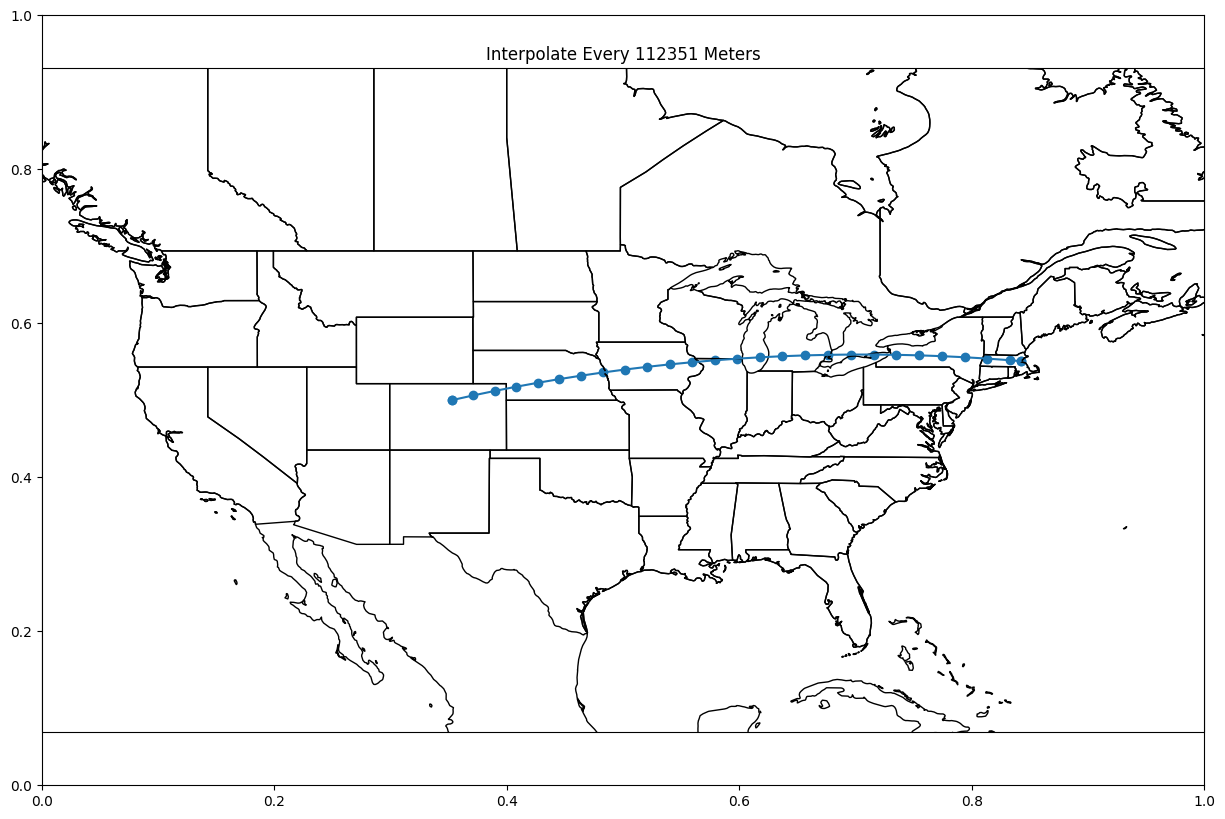

In [1044]:
every_n_meters_with_start_end = [(boulder_coords["latitude"], boulder_coords["longitude"])] + every_n_meters_pts + [(boston_coords["latitude"],boston_coords["longitude"])]
plot_coordinate(every_n_meters_with_start_end, f"Interpolate Every {distance_between_points_meter} Meters")

### TODO: Intermediate Point
> Here we find points (lat,lon) a given fraction of the distance (d) between them. Suppose the starting point is (lat1,lon1) and the final point (lat2,lon2) and we want the point a fraction f along the great circle route. f=0 is point 1. f=1 is point 2. The two points cannot be antipodal ( i.e. lat1+lat2=0 and abs(lon1-lon2)=pi) because then the route is undefined. The intermediate latitude and longitude is then given by
```
A=sin((1-f)*d)/sin(d)
B=sin(f*d)/sin(d)
x = A*cos(lat1)*cos(lon1) +  B*cos(lat2)*cos(lon2)
y = A*cos(lat1)*sin(lon1) +  B*cos(lat2)*sin(lon2)
z = A*sin(lat1)           +  B*sin(lat2)
lat=atan2(z,sqrt(x^2+y^2))
lon=atan2(y,x)
```


## gc_pnt2gc: Finds the angular distance from a point to a great circle 

- Cross track distance: angular distance from point P to great circle path
- Along track distance: angular distance along the great circle path from A to B before hitting a point that is closest to point P

Cross-Track Distance, sometimes known as cross track error, can also be determined with vectors (typically simpler too)

### Cross Track Distance
Distance of a poitn to a great circle arc

```
dxt = asin( sin(δ13) ⋅ sin(θ13−θ12) ) * R
```
- δ13 (delta_13) is (angular) distance from start point to third point
- θ13 (theta_13) is (initial) bearing from start point to third point
- θ12 (theta_12) is (initial) bearing from start point to end point
- R is the earth’s radius

```
d_xt = np.arcsin(np.sin(delta_13)*np.sin(theta_13 - theta_12)) * R
```
```
XTD =asin(sin(dist_AD)*sin(crs_AD-crs_AB))
```
> positive XTD means right of course, negative means left

> If the point A is the N. or S. Pole replace crs_AD-crs_AB with 
lon_D-lon_B or lon_B-lon_D, respectively
 
### Along Track Distance

```
dat = acos( cos(δ13) / cos(δxt) ) * R
```
- δ13 (delta_13) is (angular) distance from start point to third point
- δxt (delta_xt) is (angular) cross-track distance
- R is the earth’s radius

```
d_at = np.arccos(np.cos(delta_13)/np.cos(d_xt/R)) * R
```
```
ATD=acos(cos(dist_AD)/cos(XTD))
```
>  For very short distances (is less susceptible to rounding error):
```
ATD=asin(sqrt( (sin(dist_AD))^2 - (sin(XTD))^2 )/cos(XTD))
```
References:
- [Aviation Formulary V1.47](https://edwilliams.org/avform147.htm)
- [Moveable Type Script](www.movable-type.co.uk/scripts/latlong.html)

In [1045]:
def cross_track_distance(start_point=None, end_point=None, new_point=None):
    fwd_bearing_start_end, _, _ = geodesic.inv(start_point["longitude"],
                                               start_point["latitude"], 
                                               end_point["longitude"],
                                               end_point["latitude"])
    fwd_bearing_start_new, _, distance_m_start_new = geodesic.inv(start_point["longitude"],
                                                                  start_point["latitude"], 
                                                                  new_point["longitude"],
                                                                  new_point["latitude"]) 

    angular_distance_start_new = distance_m_start_new / earth_radius
    ct_distance = np.arcsin(np.sin(angular_distance_start_new) * np.sin(np.deg2rad(fwd_bearing_start_new - fwd_bearing_start_end))) * earth_radius
    return ct_distance

In [1046]:
def along_track_distance(start_point=None, end_point=None, new_point=None):
    crosst_distance = cross_track_distance(start_point, end_point, new_point)

    _, _, distance_m_start_new = geodesic.inv(start_point["longitude"],
                                               start_point["latitude"], 
                                               new_point["longitude"],
                                               new_point["latitude"])  
    angular_distance_start_new = distance_m_start_new / earth_radius
    at_distance = np.arccos(np.cos(angular_distance_start_new) / np.cos(crosst_distance / earth_radius)) * earth_radius
    return at_distance

In [1047]:
# Distance point along great circle path
# "Destination point given distance and bearing from start point"
def point_along_path(start_point=None, end_point=None, distance=None):
    fwd_bearing, _, _ = geodesic.inv(start_point["longitude"],
                                               start_point["latitude"], 
                                               end_point["longitude"],
                                               end_point["latitude"])  
    '''
    print(start_point["latitude"], start_point["longitude"])
    print(f"forward bearing            = {fwd_bearing}")
    print(f"distance to travel         = {distance/1000} km")

    final_lat = np.arcsin( np.sin(np.deg2rad(start_point["latitude"])) * 
                           np.cos(distance/earth_radius) + 
                           np.cos(np.deg2rad(start_point["latitude"])) *
                           np.sin(distance/earth_radius) *
                           np.cos(np.deg2rad(fwd_bearing)))

    x = np.sin(np.rad2deg(fwd_bearing)) * np.sin(distance/earth_radius) * np.cos(np.deg2rad(start_point["latitude"]))
    y = np.cos(distance/earth_radius) - np.sin(np.deg2rad(start_point["latitude"])) * np.sin(np.rad2deg(final_lat))
    final_lon = np.deg2rad(start_point["longitude"]) + np.arctan2(x, y)
    # noramlize longitude from -180 to 180
    #normal_lon = np.mod(final_lon + 540, 360) - 180
    return (np.rad2deg(final_lat), np.rad2deg(final_lon))
    '''
    origin = geopy.Point(start_point["latitude"], start_point["longitude"])
    distance_to_move = geopy.distance.distance(
                            kilometers=distance / 1000)  # distance to move towards the next point
    final_position = distance_to_move.destination(origin, bearing=fwd_bearing)
    return (final_position.latitude, final_position.longitude)

In [1048]:
### Distance from Boulder->Boston Great Circle Path to New Point
## EXAMPLE:
ct_distance = cross_track_distance(boulder_coords, boston_coords, wichita_coords)
print(f"Cross Track Distance: \n{ct_distance} meters ({ct_distance/1000} km)")

at_distance = along_track_distance(boulder_coords, boston_coords, wichita_coords)
print(f"Along Track Distance: \n{at_distance} meters ({at_distance/1000} km)\n")

closest_point = point_along_path(boulder_coords, boston_coords, at_distance)
print(f"Closest Point To Point Along Great Circle Path:\n{closest_point}") 
# compare with: https://www.fcc.gov/media/radio/find-terminal-coordinates

Cross Track Distance: 
416299.91386936075 meters (416.29991386936075 km)
Along Track Distance: 
607142.398159732 meters (607.142398159732 km)

Closest Point To Point Along Great Circle Path:
(41.35983856574507, -98.30638480837355)


### Plot Arcs

In [1049]:
def arc_points(start_lat=None,
               start_lon=None,
               end_lat=None,
               end_lon=None,
               n_total_points=10):
    _, _, distance_meter =  geodesic.inv(start_lon,
                                        start_lat,
                                        end_lon,
                                        end_lat)
        
    distance_between_points_meter = distance_meter / (n_total_points + 1)

    
    new_points_lst = interpolate_points_along_gc(start_lat,
                                              start_lon,
                                              end_lat,
                                              end_lon,
                                              distance_between_points_meter)
    return new_points_lst

In [1050]:
def plot_arcs(great_circle_arc_pts=None,
              new_point_arc_pts=None,
              closest_point=None,
              cross_track_distance=None):
    #plt.style.use('dark_background')
    # Set up world map plot
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    lon_west, lon_east, lat_south, lat_north = -130, -60, 20, 60
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.STATES, edgecolor="black")
    
    # Plot Latitude/Longitude Location
    longitudes = [x[1] for x in great_circle_arc_pts] # longitude
    latitudes = [x[0] for x in great_circle_arc_pts] # latitude
    plt.plot(longitudes, latitudes, c="purple")
    plt.scatter(longitudes, latitudes, c="purple")

    longitudes = [x[1] for x in new_point_arc_pts] # longitude
    latitudes = [x[0] for x in new_point_arc_pts] # latitude
    plt.plot(longitudes, latitudes, c="green")
    plt.scatter(longitudes, latitudes, c="green")

    # plot closest_point in red
    plt.scatter(closest_point[1], closest_point[0], c="red")

    plt.title(f"Closest Point to Arc {closest_point}, Cross-Track Distance = {cross_track_distance} km")
    plt.show()

In [1051]:
def generate_example_data_and_plot(start_coords, end_coords, new_point_coords):
    ### Distance from Boulder->Boston Great Circle Path to New Point
    ct_distance = cross_track_distance(start_coords, end_coords, new_point_coords)
    print(f"Cross Track Distance: \n{ct_distance} meters ({ct_distance/1000} km)")

    at_distance = along_track_distance(start_coords, end_coords, new_point_coords)
    print(f"Along Track Distance: \n{at_distance} meters ({at_distance/1000} km)")

    closest_point = point_along_path(start_coords, end_coords, at_distance)
    print(f"Closest Point To Point Along Great Circle Path:\n{closest_point}") 

    # Plot
    great_circle_arc_points = arc_points(start_coords["latitude"],
                                     start_coords["longitude"],
                                     end_coords["latitude"],
                                     end_coords["longitude"],
                                    10)
    new_point_arc_points = arc_points(closest_point[0],
                                  closest_point[1],
                                  new_point_coords["latitude"],
                                  new_point_coords["longitude"],
                                 10)

    plot_arcs(great_circle_arc_points, new_point_arc_points, closest_point, ct_distance/1000)    

Cross Track Distance: 
416299.91386936075 meters (416.29991386936075 km)
Along Track Distance: 
607142.398159732 meters (607.142398159732 km)
Closest Point To Point Along Great Circle Path:
(41.35983856574507, -98.30638480837355)


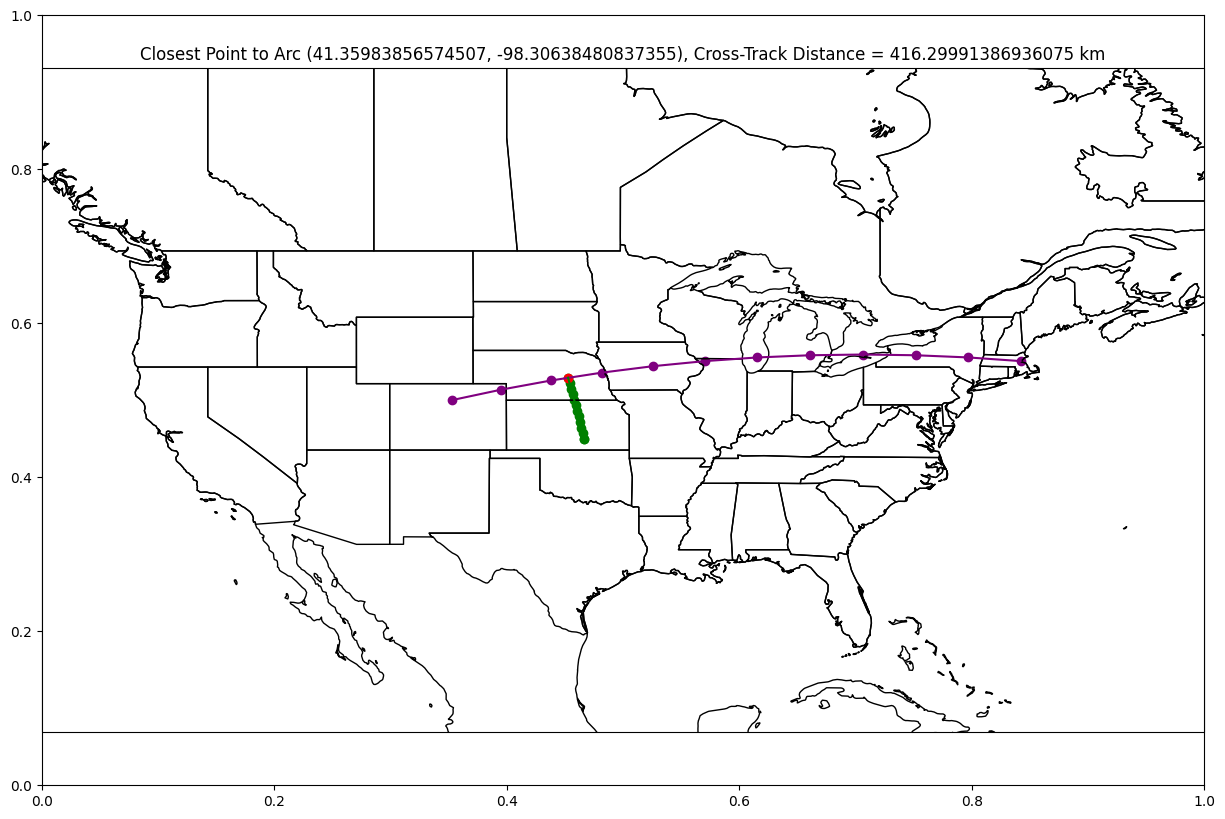

In [1052]:
generate_example_data_and_plot(boulder_coords, boston_coords, wichita_coords)

Cross Track Distance: 
1320820.0818162917 meters (1320.8200818162916 km)
Along Track Distance: 
1046317.7848823429 meters (1046.317784882343 km)
Closest Point To Point Along Great Circle Path:
(42.06180730392739, -93.11233142501752)


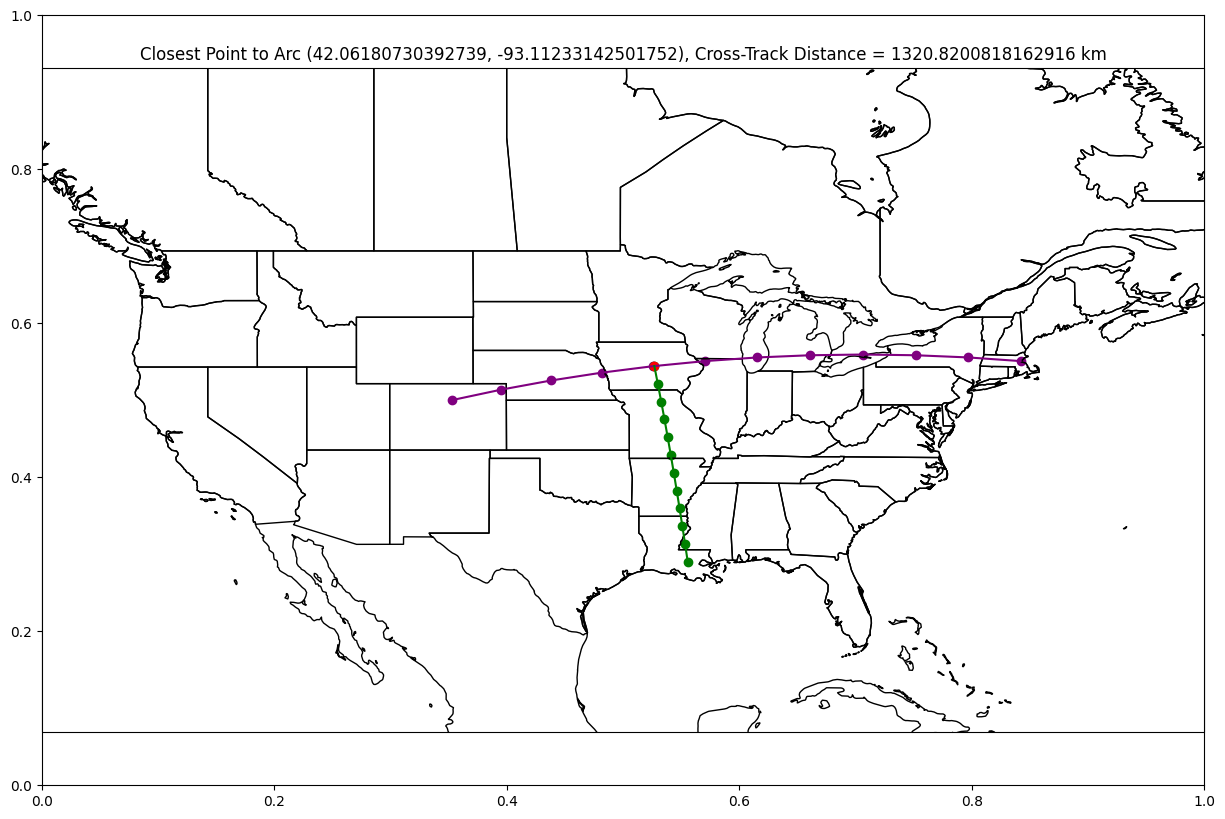

In [1053]:
baton_rouge_lat_lon = (30.27, -91.10)
new_point_lat_lon = baton_rouge_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

Cross Track Distance: 
1313960.8826395303 meters (1313.9608826395304 km)
Along Track Distance: 
621566.8858927714 meters (621.5668858927714 km)
Closest Point To Point Along Great Circle Path:
(41.386598145433815, -98.13766368733828)


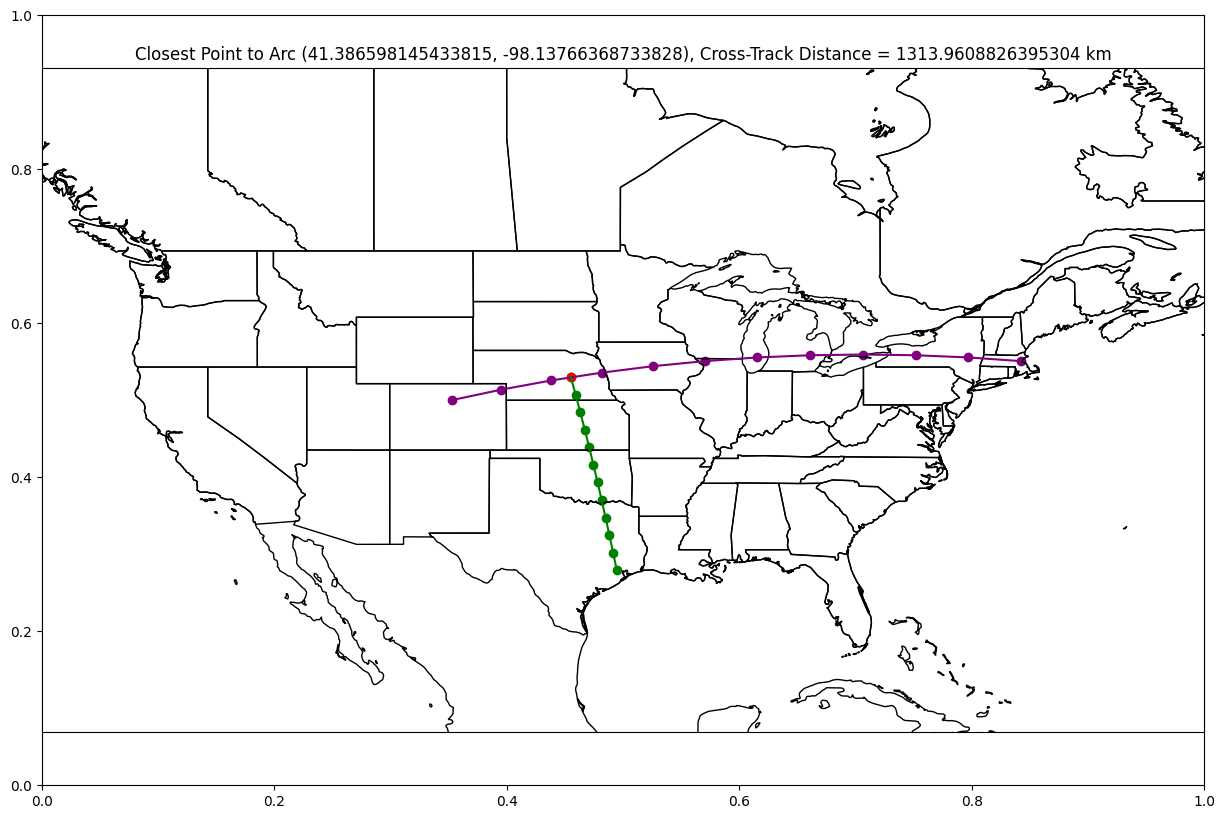

In [1054]:
houston_lat_lon = (29.76, -95.37) # NASA
new_point_lat_lon = houston_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

Cross Track Distance: 
296883.18278176885 meters (296.8831827817688 km)
Along Track Distance: 
2542319.4122483437 meters (2542.3194122483437 km)
Closest Point To Point Along Great Circle Path:
(42.61746878737948, -74.9393760063952)


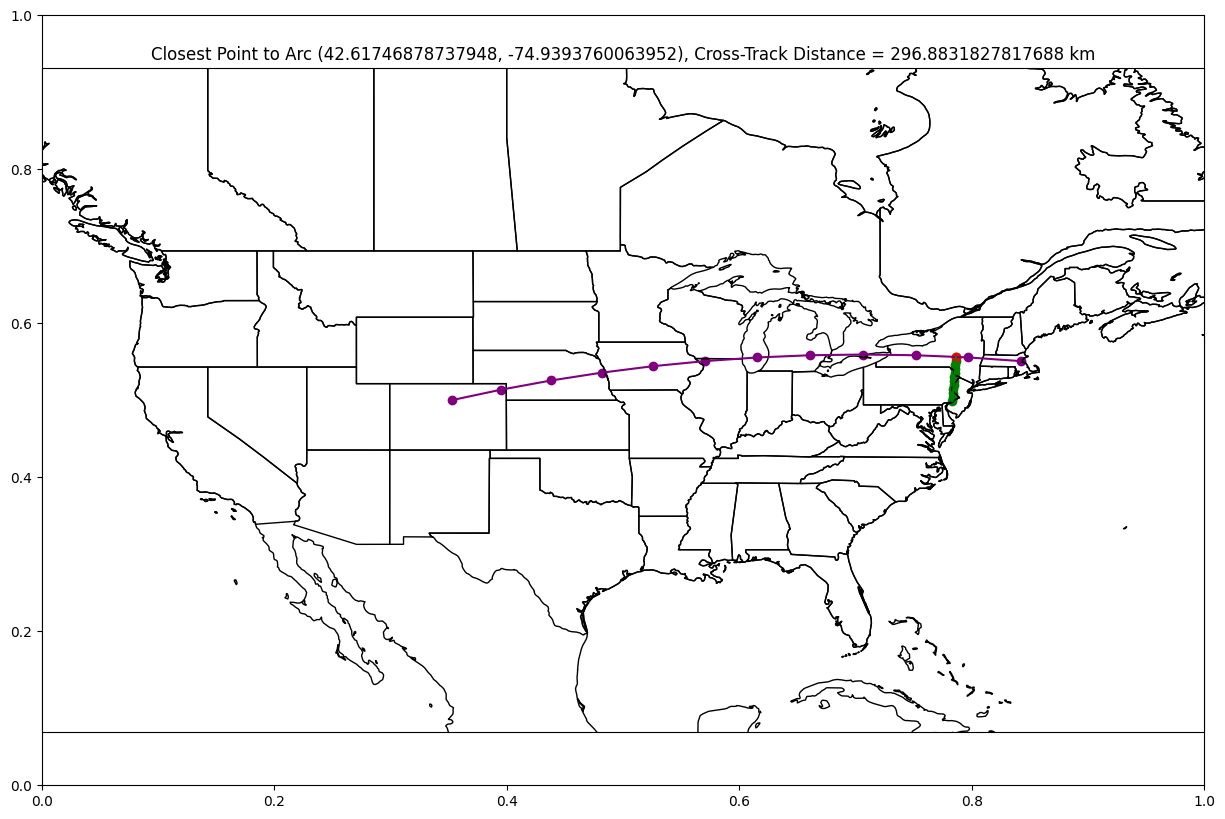

In [1055]:
philadelphia_lat_lon = (39.95, -75.17)
new_point_lat_lon = philadelphia_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

Cross Track Distance: 
1367928.4434214404 meters (1367.9284434214405 km)
Along Track Distance: 
1141721.8908209854 meters (1141.7218908209854 km)
Closest Point To Point Along Great Circle Path:
(42.182914279501965, -91.97011803874736)


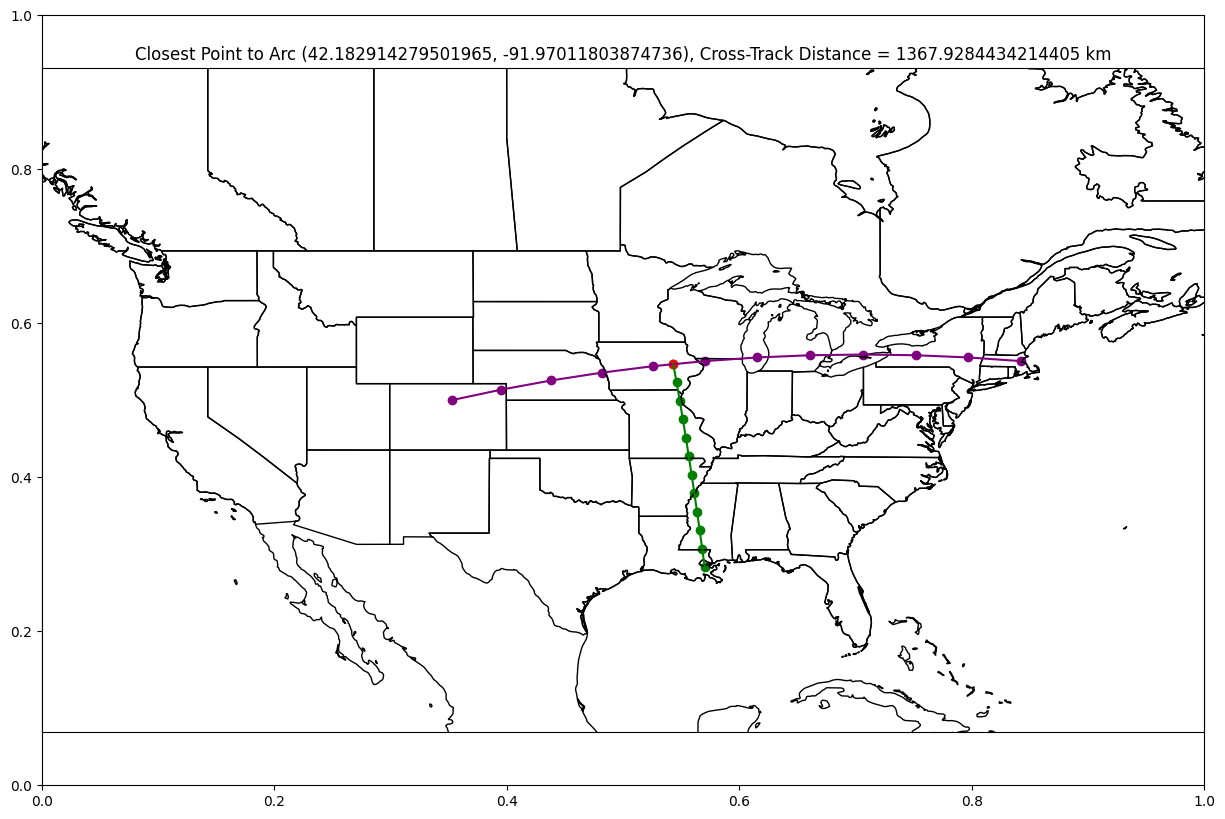

In [1056]:
new_orleans_lat_lon = (29.95, -90.08)
new_point_lat_lon = new_orleans_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

## TODO: Solve for Points Beyond Arc

_Current Bug_: appears to be using the middle of the arc

Cross Track Distance: 
208591.98526692743 meters (208.59198526692742 km)
Along Track Distance: 
1297936.272721694 meters (1297.9362727216942 km)
Closest Point To Point Along Great Circle Path:
(42.35652501751043, -90.09105248940998)


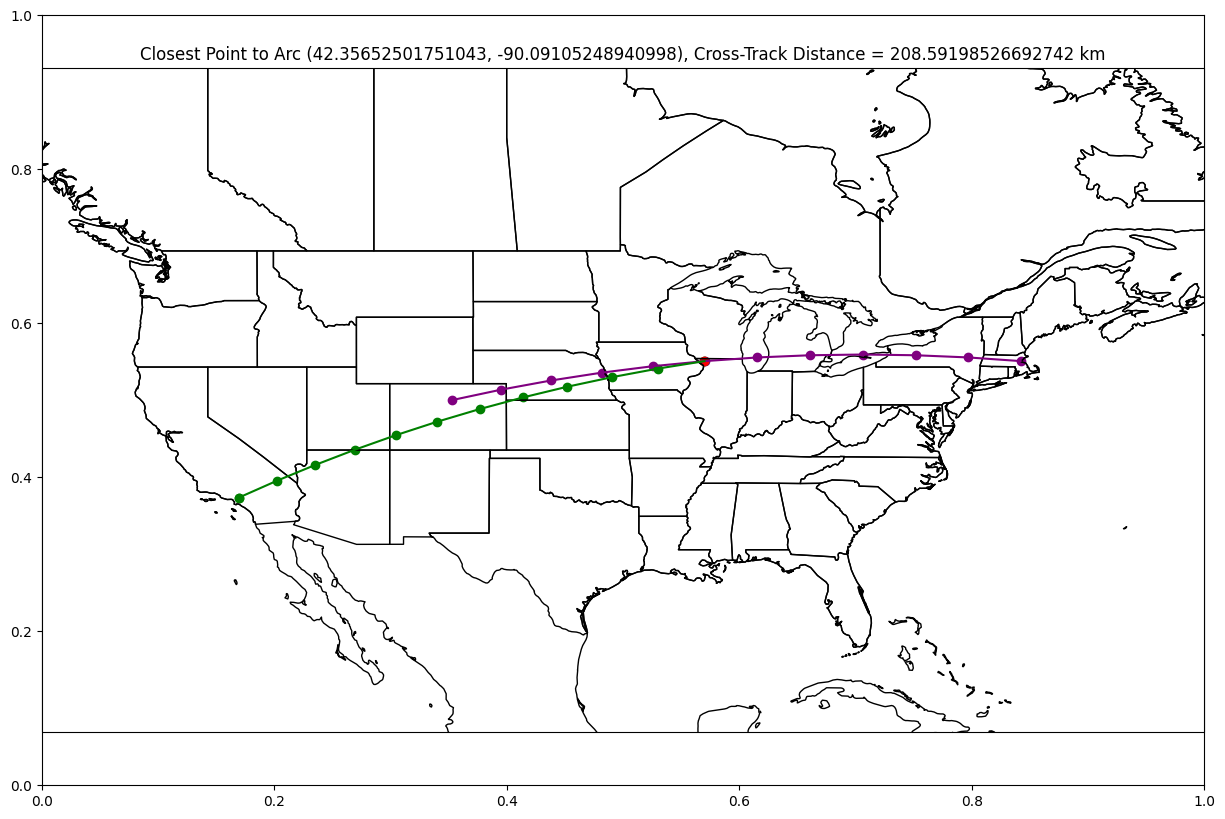

In [1057]:
caltech_lat_lon = (34.14, -118.13)
new_point_lat_lon = caltech_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

Cross Track Distance: 
-743815.4433657554 meters (-743.8154433657554 km)
Along Track Distance: 
1408988.2839956256 meters (1408.9882839956256 km)
Closest Point To Point Along Great Circle Path:
(42.461135406283205, -88.7493878740062)


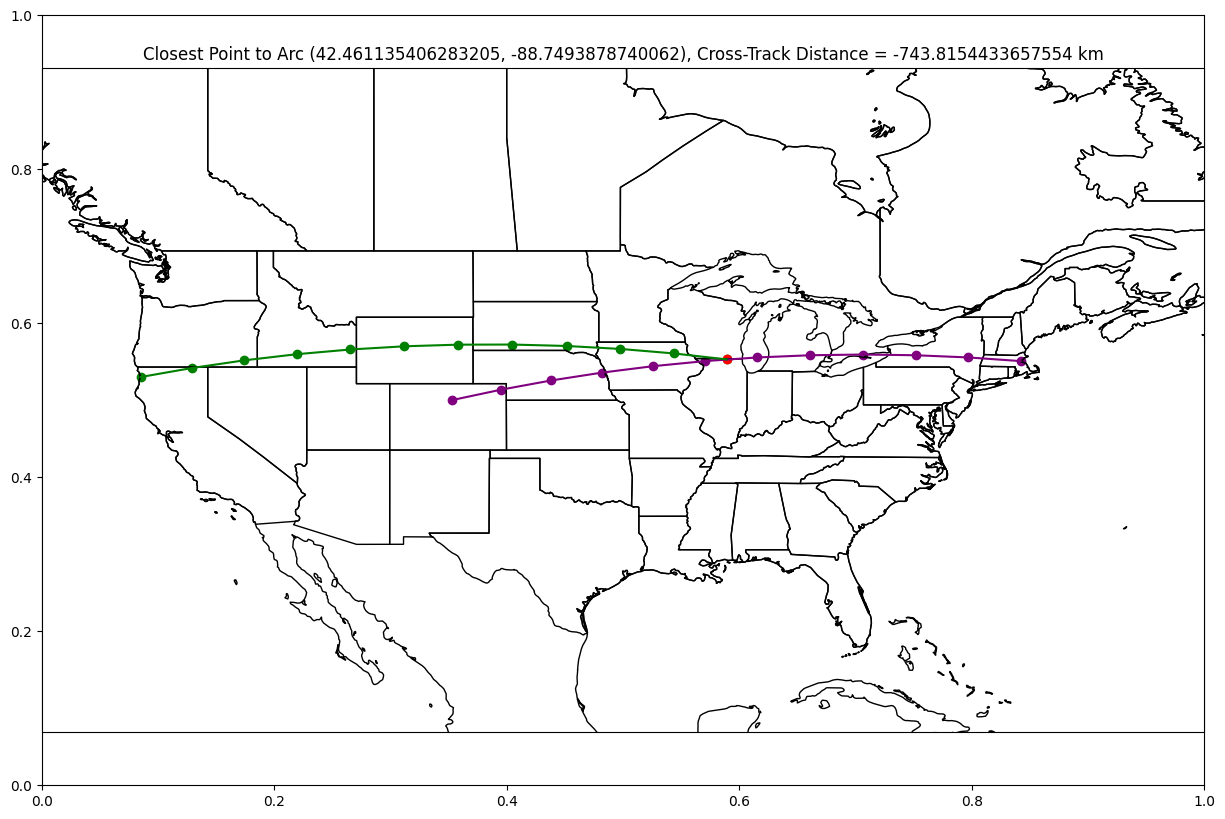

In [1058]:
red_woods_lat_lon = (41.40, -124.04)
new_point_lat_lon = red_woods_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

Cross Track Distance: 
377060.0143628207 meters (377.0600143628207 km)
Along Track Distance: 
139824.92037864792 meters (139.82492037864793 km)
Closest Point To Point Along Great Circle Path:
(40.36170423779019, -103.6919986508387)


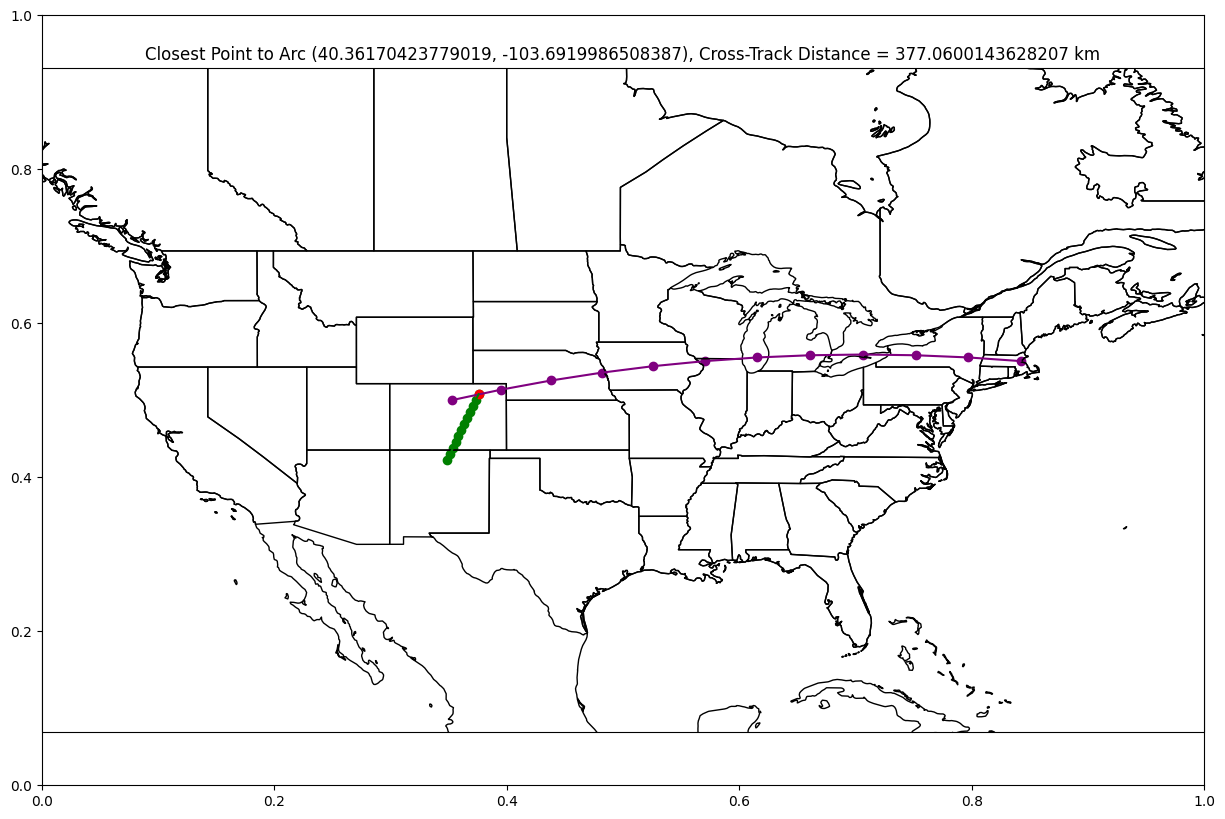

In [1059]:
taos_lat_lon = (36.40, -105.57)
new_point_lat_lon = taos_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

Cross Track Distance: 
247175.4661611764 meters (247.1754661611764 km)
Along Track Distance: 
233331.4563023187 meters (233.33145630231868 km)
Closest Point To Point Along Great Circle Path:
(40.5814353178229, -102.62756564813134)


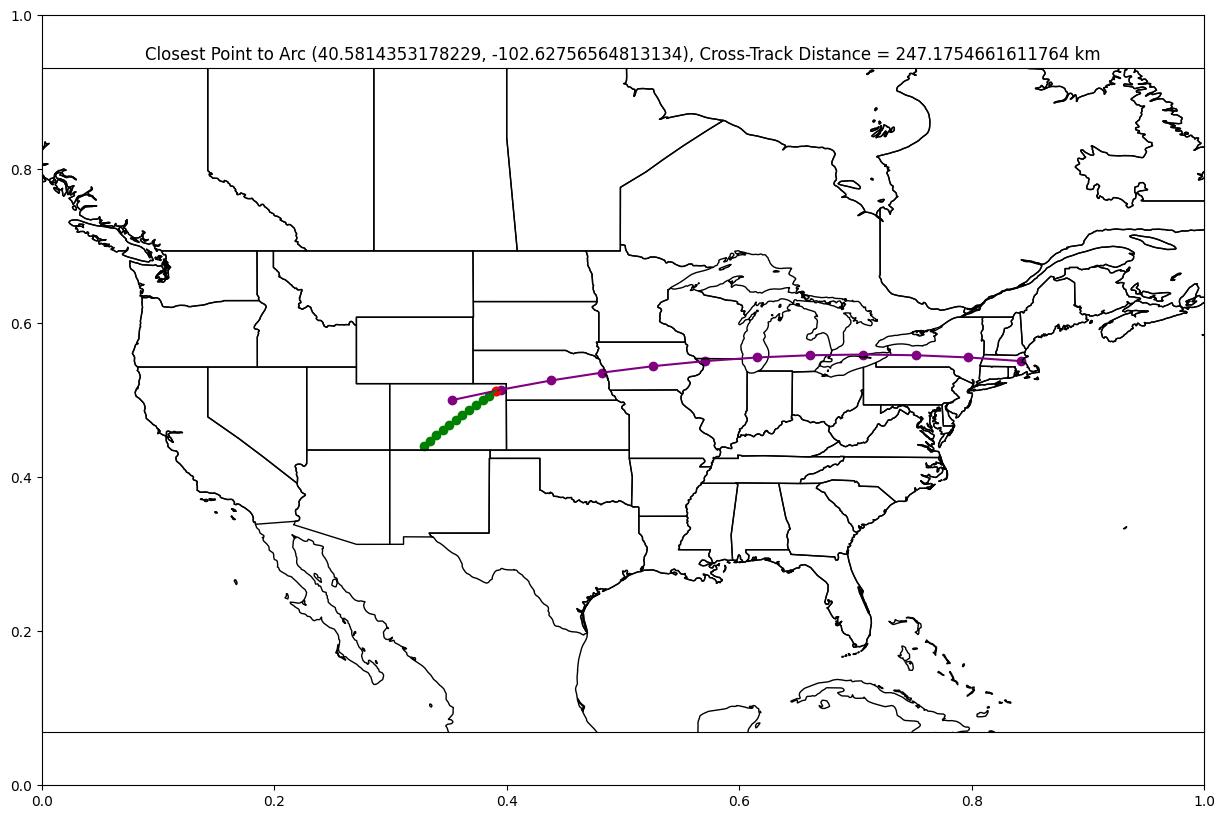

In [1060]:
pagosa_spring_lat_lon = (37.27, -107.0)
new_point_lat_lon = pagosa_spring_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
generate_example_data_and_plot(boulder_coords, boston_coords, new_point_coords)

### TODO: Cross-Track Distance via Vectors

[Cross-track distance via vectors](http://www.movable-type.co.uk/scripts/latlong-vectors.html#intersection)

> Since a great circle is represented by a vector perpendicular to the plane, if α is the angle between the vector representing the point and vector representing the great circle, then the distance from the point to the great circle is:
```
d = R · (90° − α)
```

# Get Points on Great Circle Defined by Two Points in Circle

> Any two distinct points on a sphere that are not antipodal (diametrically opposite) both lie on a unique great circle, which the points separate into two arcs; the length of the shorter arc is the great-circle distance between the points. This arc length is proportional to the central angle between the points, which if measured in radians can be scaled up by the sphere's radius to obtain the arc length. Two antipodal points both lie on infinitely many great circles, each of which they divide into two arcs of length π times the radius.

[Great Circle Distance](https://en.wikipedia.org/wiki/Great-circle_distance)

### Latitude of Point on Great Circle
[Intermeditate points along the great circle](https://www.edwilliams.org/avform147.htm#Int)
> Intermediate points {lat,lon} lie on the great circle connecting points 1 and 2 when:
```
# Latitude
lat=atan((sin(lat1)*cos(lat2)*sin(lon-lon2)
     -sin(lat2)*cos(lat1)*sin(lon-lon1))/(cos(lat1)*cos(lat2)*sin(lon1-lon2)))
```

> Not applicable for meridians (where there are infinte possible great cirlces), defined by:
```
sin(lon1-lon2) = 0
```

In [1061]:
# generate n total number of longitude points along the great circle
# https://github.com/rspatial/geosphere/blob/master/R/greatCircle.R#L18C3-L18C7
def generate_longitude_along_gc(n_pts=None):
    gc_lon = []
    for lon in range(1, n_pts+1):
        new_lon = (lon  * (360/n_pts) - 180)
        gc_lon.append(new_lon)
    return gc_lon

In [1062]:
# generate latitude points along the great circle
# https://www.edwilliams.org/avform147.htm#Int
# https://github.com/rspatial/geosphere/blob/master/R/gcLat.R
def generate_latitude_along_gc(start_point=None, end_point=None, longitude_lst=None):
    lon1 = np.deg2rad(start_point["longitude"])
    lat1 = np.deg2rad(start_point["latitude"])
    lon2 = np.deg2rad(end_point["longitude"])
    lat2 = np.deg2rad(end_point["latitude"])

    # Verify not meridian (longitude passes through the poles)
    if np.sin(lon1 - lon2) == 0:
        print("Invalid inputs: start/end points are meridians")
        print("TODO: Fix for plotting meridians")
        # TODO: fix for plotting meridians at 0 longitude through all latitudes
        meridians = np.arange(-90, 90, 180/len(longitude_lst)) # split in n number
        return meridians
        

    # verify not anitpodal (diametrically opposite, points)
    # possible: https://github.com/rspatial/geosphere/blob/master/R/antipodal.R
    # Intermediate points on a great circle: https://edwilliams.org/avform147.htm :
    if lat1 + lat2 == 0 and abs(lon1-lon2) == np.pi:
        print("Invalid inputs: start/end points are antipodal")
        return []

    # note: can be expanded to handle input of np arrays by filter out antipodal/merdiain points
    
    lon_lst = np.deg2rad(longitude_lst)

    gc_lat = []
    for gc_lon in lon_lst:
        num = np.sin(lat1)*np.cos(lat2)*np.sin(gc_lon-lon2)-np.sin(lat2)*np.cos(lat1)*np.sin(gc_lon-lon1)
        den = np.cos(lat1)*np.cos(lat2)*np.sin(lon1-lon2)
        new_lat = np.arctan(num/den)
        gc_lat.append(np.rad2deg(new_lat))
    return gc_lat

In [1063]:
def plot_coordinate(lat_lst=None, lon_lst=None,
                    start_point=None, end_point=None,
                    title=None):
    #plt.style.use('dark_background')
    # Set up world map plot
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    lon_west, lon_east, lat_south, lat_north = -180, 180, -90, 90
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.STATES, edgecolor="black")
    
    # Plot Latitude/Longitude Location of great circle path
    plt.plot(lon_lst, lat_lst)
    plt.scatter(lon_lst, lat_lst)

    # Overly great circle farc rom start/end point
    start_end_lat_lon = arc_points(start_point["latitude"],start_point["longitude"],
                                   end_point["latitude"], end_point["longitude"],
                                   n_total_points=10)
    longitudes = [x[1] for x in start_end_lat_lon] # longitude
    latitudes = [x[0] for x in start_end_lat_lon] # latitude
    plt.plot(longitudes, latitudes, c="red")
    plt.scatter(longitudes, latitudes, c="red")
    
    # Setup Axis Limits and Title/Labels
    plt.title(title)
    #plt.xlabel("Longitude (Degrees)")
    #plt.ylabel("Latitude (Degrees)")
    plt.show()

In [1064]:
n = 360
lon_pts = generate_longitude_along_gc(n)

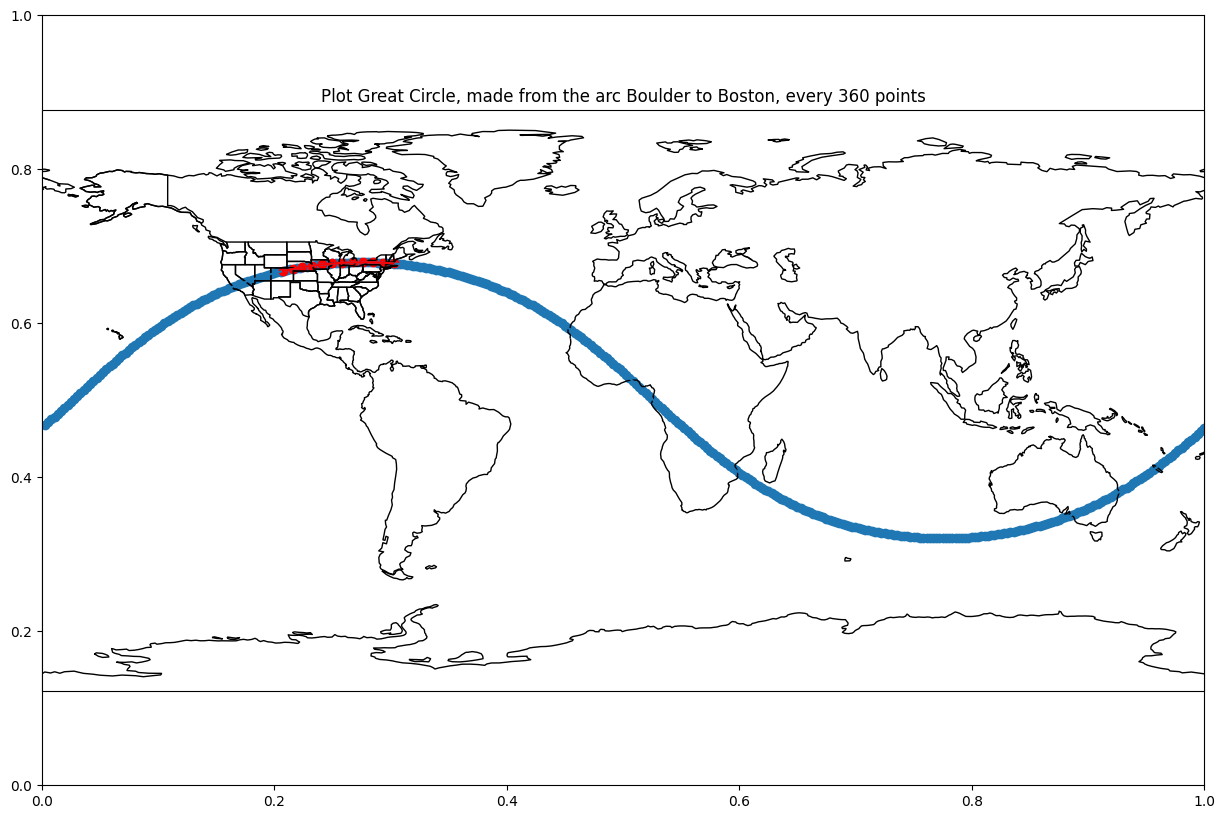

In [1065]:
lat_pts = generate_latitude_along_gc(boulder_coords, boston_coords, lon_pts)
plot_coordinate(lat_pts, lon_pts,boulder_coords, boston_coords,
                f"Plot Great Circle, made from the arc Boulder to Boston, every {n} points")

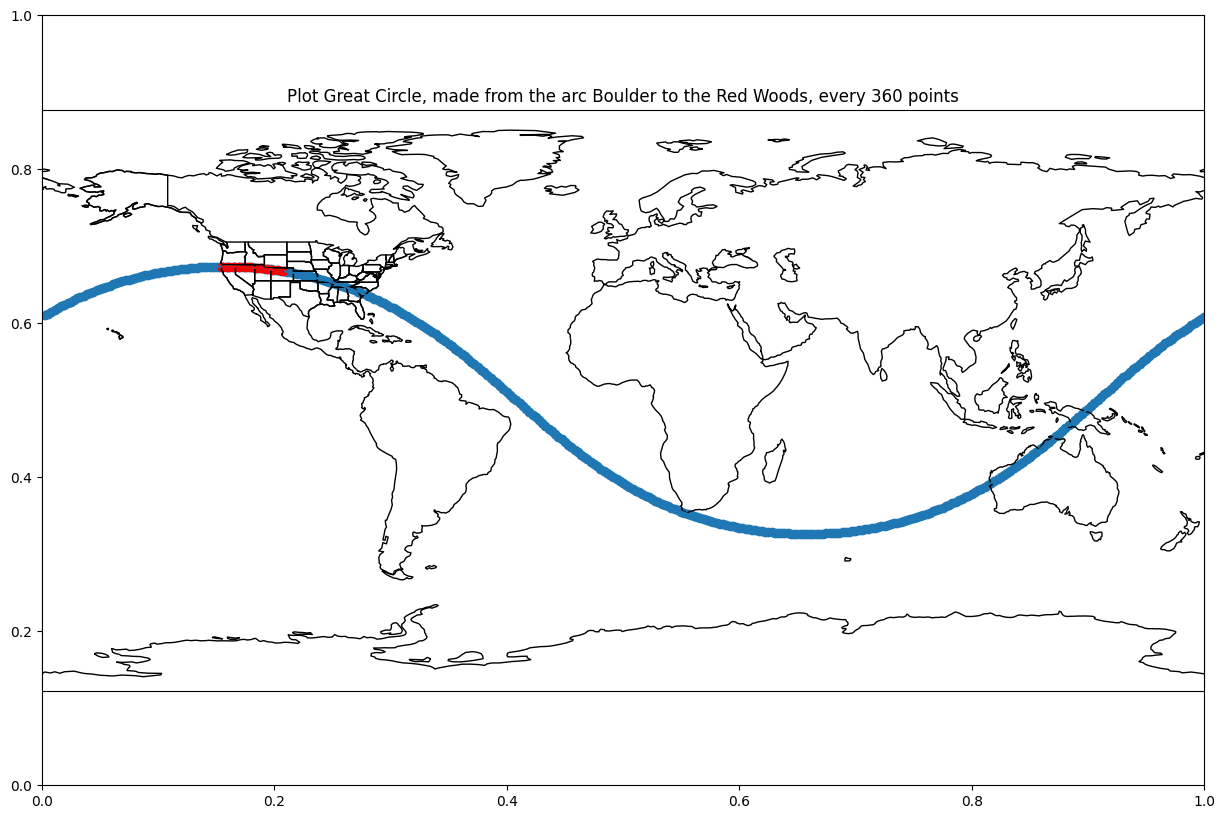

In [1066]:
red_woods_lat_lon = (41.40, -124.04)
new_point_lat_lon = red_woods_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
lat_pts = generate_latitude_along_gc(boulder_coords, new_point_coords, lon_pts)
plot_coordinate(lat_pts, lon_pts,boulder_coords, new_point_coords,
                f"Plot Great Circle, made from the arc Boulder to the Red Woods, every {n} points")

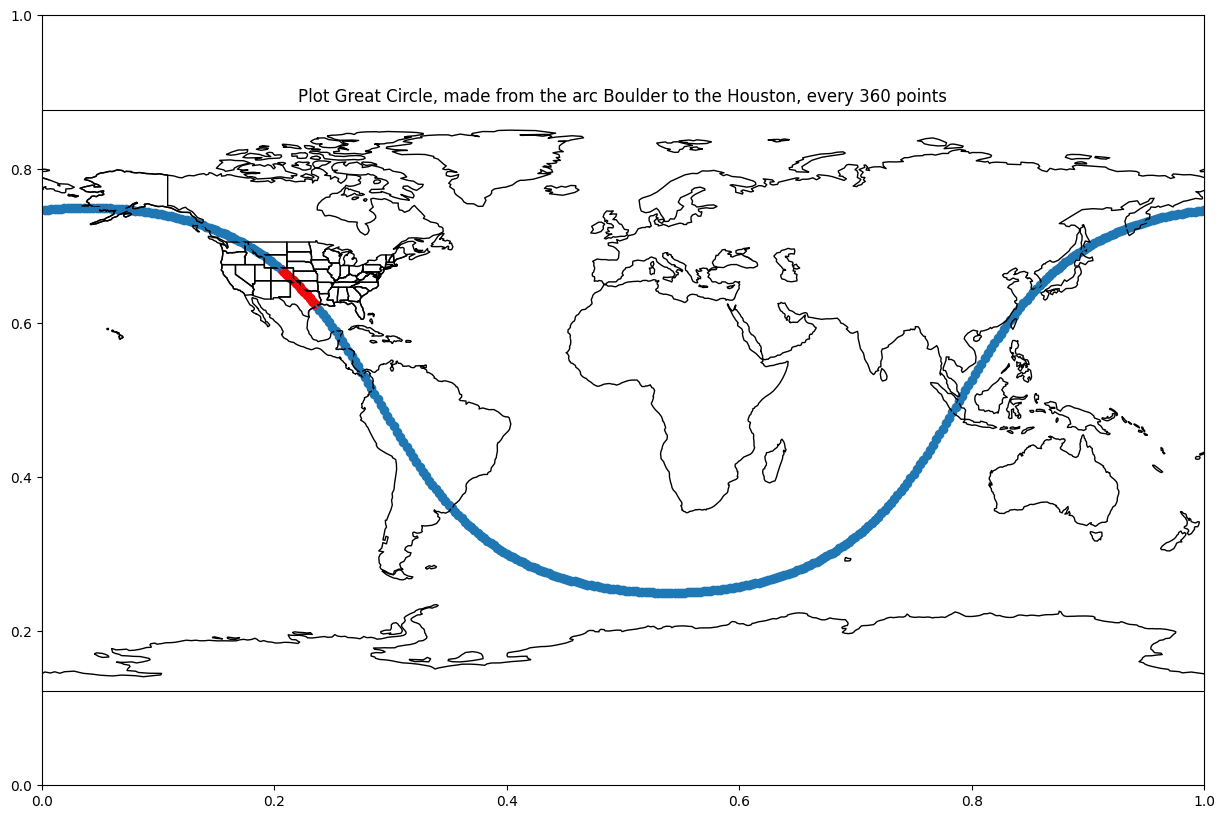

In [1067]:
houston_lat_lon = (29.76, -95.37) # NASA
new_point_lat_lon = houston_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
lat_pts = generate_latitude_along_gc(boulder_coords, new_point_coords, lon_pts)
plot_coordinate(lat_pts, lon_pts,boulder_coords, new_point_coords,
                f"Plot Great Circle, made from the arc Boulder to the Houston, every {n} points")

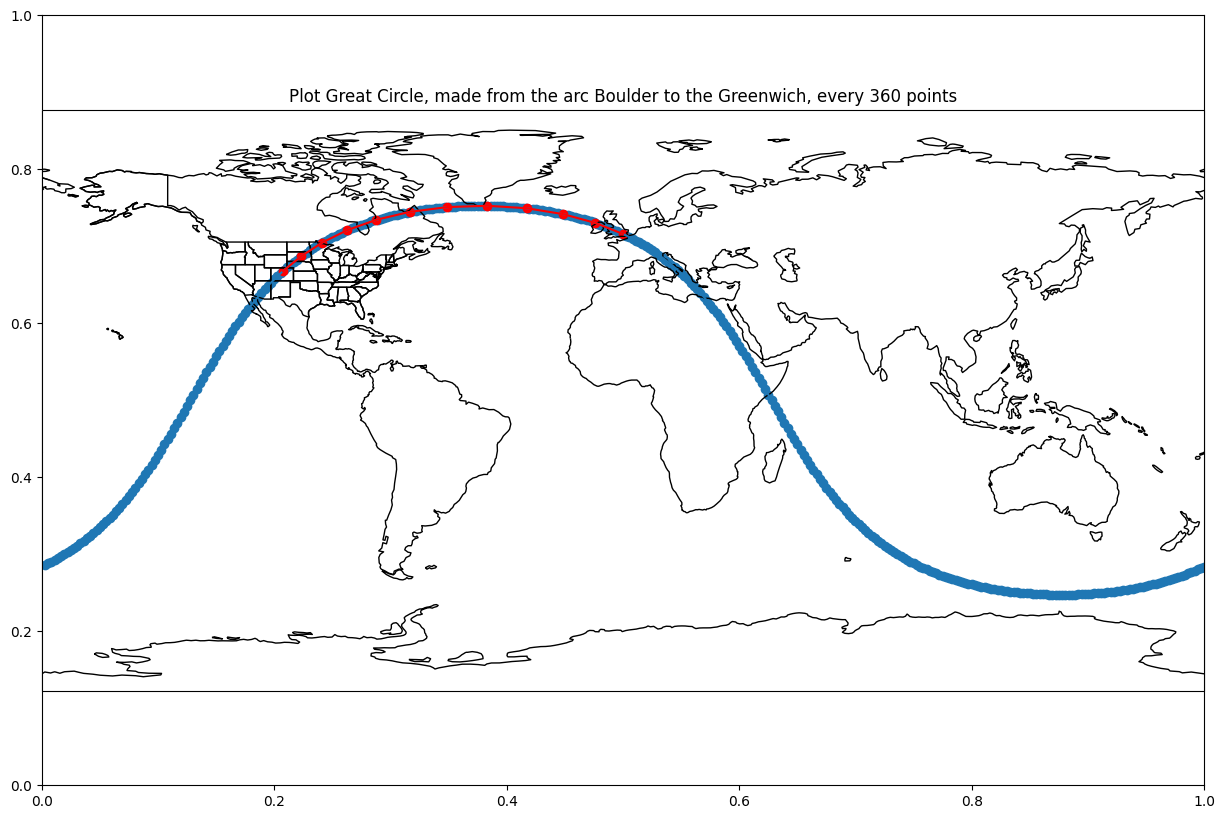

In [1068]:
greenwich_lat_lon = (51.49, 0.0098)
new_point_lat_lon = greenwich_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
lat_pts = generate_latitude_along_gc(boulder_coords, new_point_coords, lon_pts)
plot_coordinate(lat_pts, lon_pts,boulder_coords, new_point_coords,
                f"Plot Great Circle, made from the arc Boulder to the Greenwich, every {n} points")

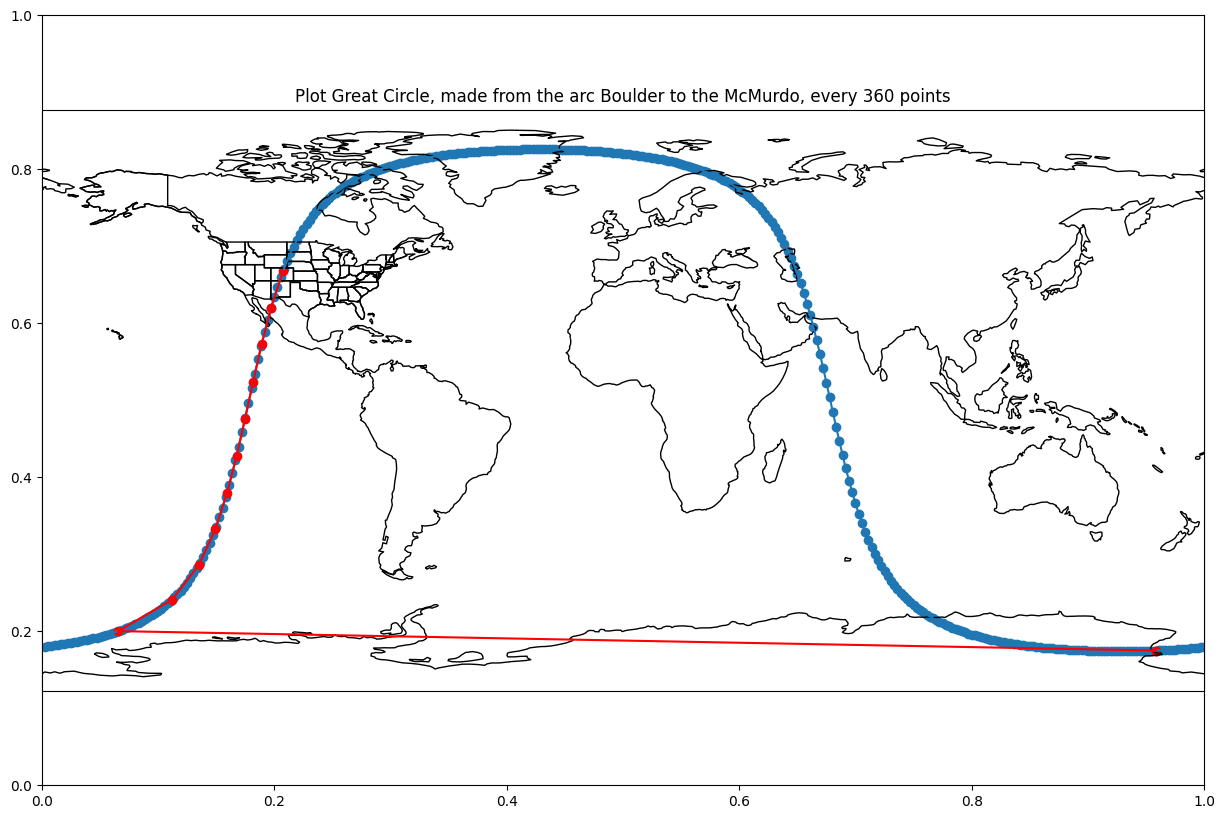

In [1069]:
mcmurdo_lat_lon = (-77.5, 165)
new_point_lat_lon = mcmurdo_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])
lat_pts = generate_latitude_along_gc(boulder_coords, new_point_coords, lon_pts)
plot_coordinate(lat_pts, lon_pts,boulder_coords, new_point_coords,
                f"Plot Great Circle, made from the arc Boulder to the McMurdo, every {n} points")

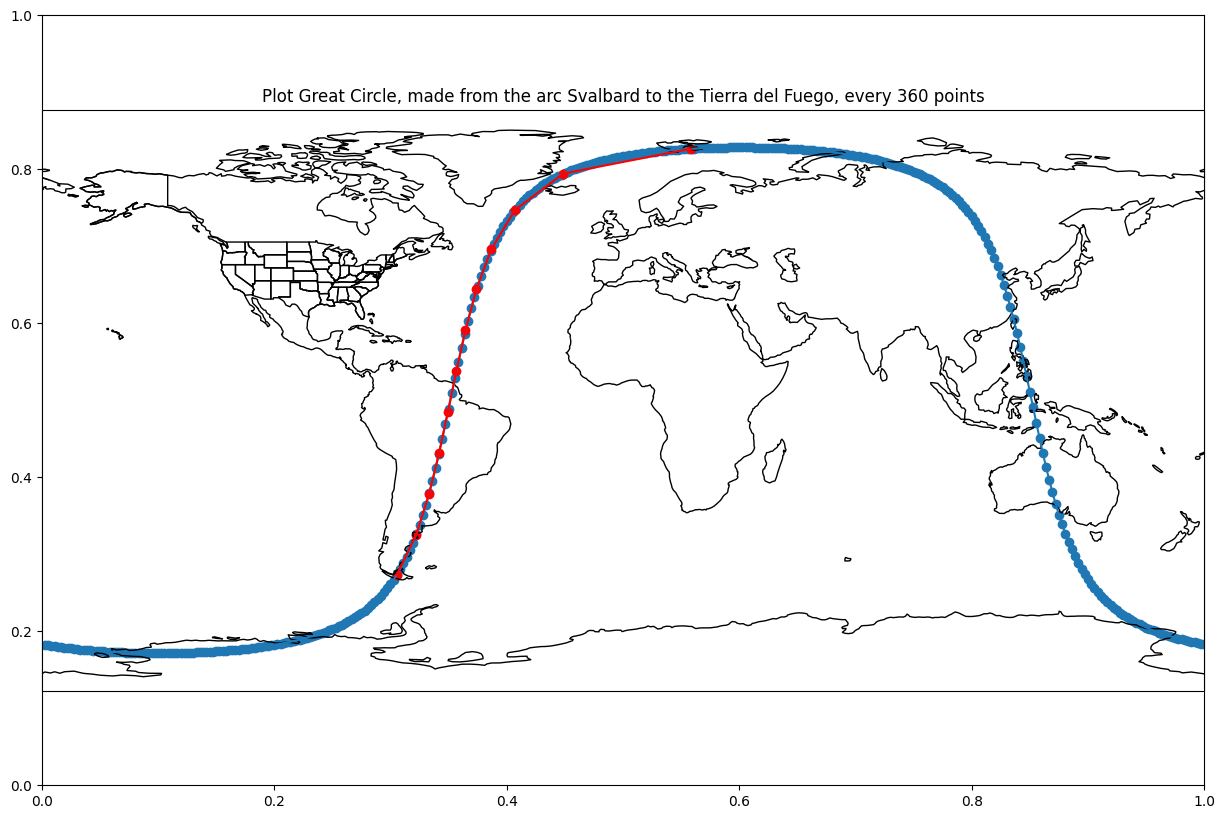

In [1070]:
svalbard_lat_lon = (77.88, 20.98)
svalbard_lat_lon_coords = return_all_coords(svalbard_lat_lon[0], svalbard_lat_lon[1])
tierradelfuego_lat_lon = (-54.0, -70)
tierradelfuego_lat_lon_coords = return_all_coords(tierradelfuego_lat_lon[0], tierradelfuego_lat_lon[1])
lat_pts = generate_latitude_along_gc(svalbard_lat_lon_coords, tierradelfuego_lat_lon_coords, lon_pts)
plot_coordinate(lat_pts, lon_pts,svalbard_lat_lon_coords, tierradelfuego_lat_lon_coords,
                f"Plot Great Circle, made from the arc Svalbard to the Tierra del Fuego, every {n} points")

## Maximum Latitude on a Great Circle

Using latitude/longitude found when creating a great circle from two points
> The southern-most point is the antipode (a point at the opposite end of the world) of the northern-most point
- [R Example from GeoSphere](https://rspatial.org/raster/sphere/4-tracks.html#maximum-latitude-on-a-great-circle)

In [1071]:
def find_max_min_latitude_gc(start_point=None, end_point=None):
    lon_pts = generate_longitude_along_gc(360)
    lat_pts = generate_latitude_along_gc(start_point, end_point, lon_pts)
    max_lat_lon = (np.max(lat_pts), lon_pts[np.argmax(lat_pts)])
    min_lat_lon = (np.min(lat_pts), lon_pts[np.argmin(lat_pts)])
    return max_lat_lon, min_lat_lon

In [1072]:
def plot_coordinate_max_min(lat_lst=None, lon_lst=None,
                            start_point=None, end_point=None,
                            max_coord=None, min_coord=None,
                            title=None):
    #plt.style.use('dark_background')
    # Set up world map plot
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    lon_west, lon_east, lat_south, lat_north = -180, 180, -90, 90
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.STATES, edgecolor="black")
    
    # Plot Latitude/Longitude Location
    plt.plot(lon_lst, lat_lst)
    #plt.scatter(lon_lst, lat_lst)

    # Overly great circle from start/end point
    start_end_lat_lon = arc_points(start_point["latitude"],start_point["longitude"],
                                   end_point["latitude"], end_point["longitude"],
                                   n_total_points=10)
    longitudes = [x[1] for x in start_end_lat_lon] # longitude
    latitudes = [x[0] for x in start_end_lat_lon] # latitude
    plt.plot(longitudes, latitudes, c="red")
    #plt.scatter(longitudes, latitudes, c="red")

    # Overly Max/Min Coordinates
    plt.scatter([max_coord[1],min_coord[1]], [max_coord[0],min_coord[0]], s=50, c="forestgreen")
    
    # Setup Axis Limits and Title/Labels
    plt.title(title)
    #plt.xlabel("Longitude (Degrees)")
    #plt.ylabel("Latitude (Degrees)")
    plt.show()

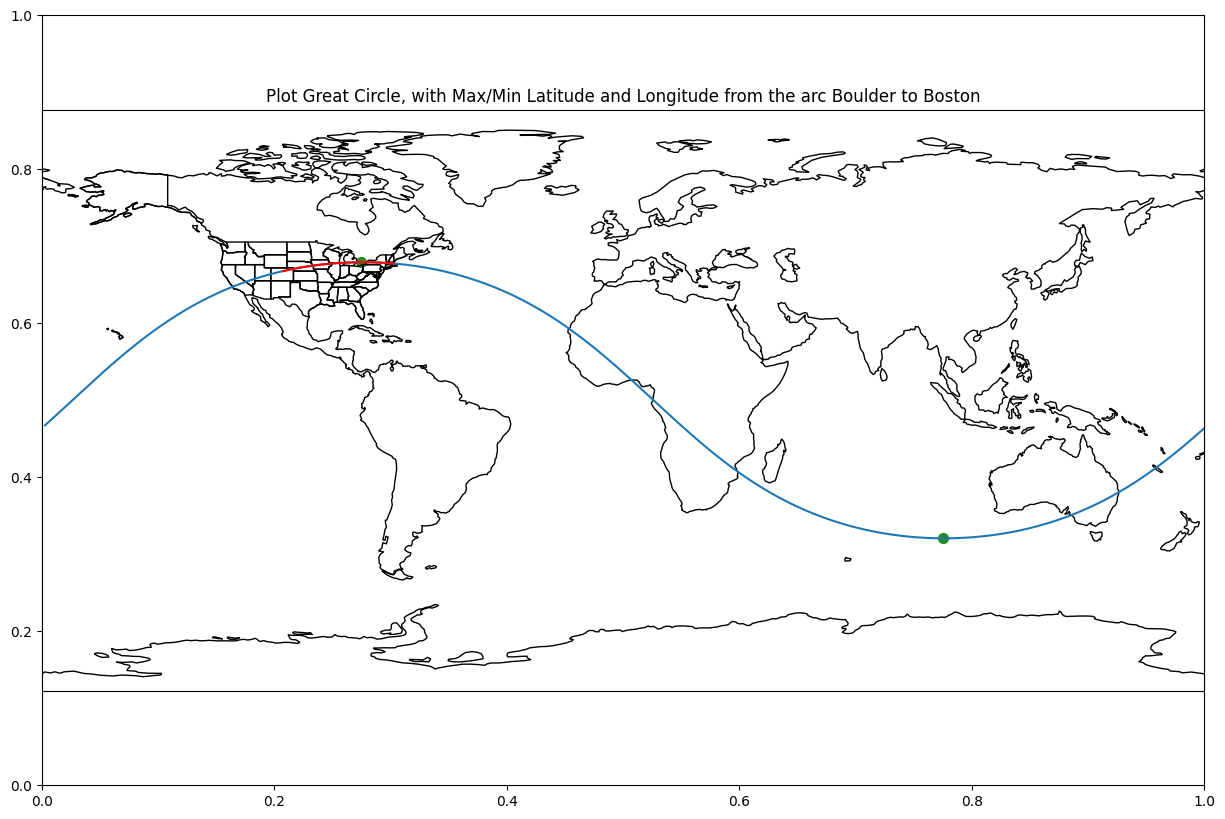

In [1073]:
max_coords, min_coords = find_max_min_latitude_gc(boulder_coords, boston_coords)
lat_pts = generate_latitude_along_gc(boulder_coords, boston_coords, lon_pts)
plot_coordinate_max_min(lat_pts, lon_pts,
                        boulder_coords, boston_coords,
                        max_coords, min_coords,
                f"Plot Great Circle, with Max/Min Latitude and Longitude from the arc Boulder to Boston")

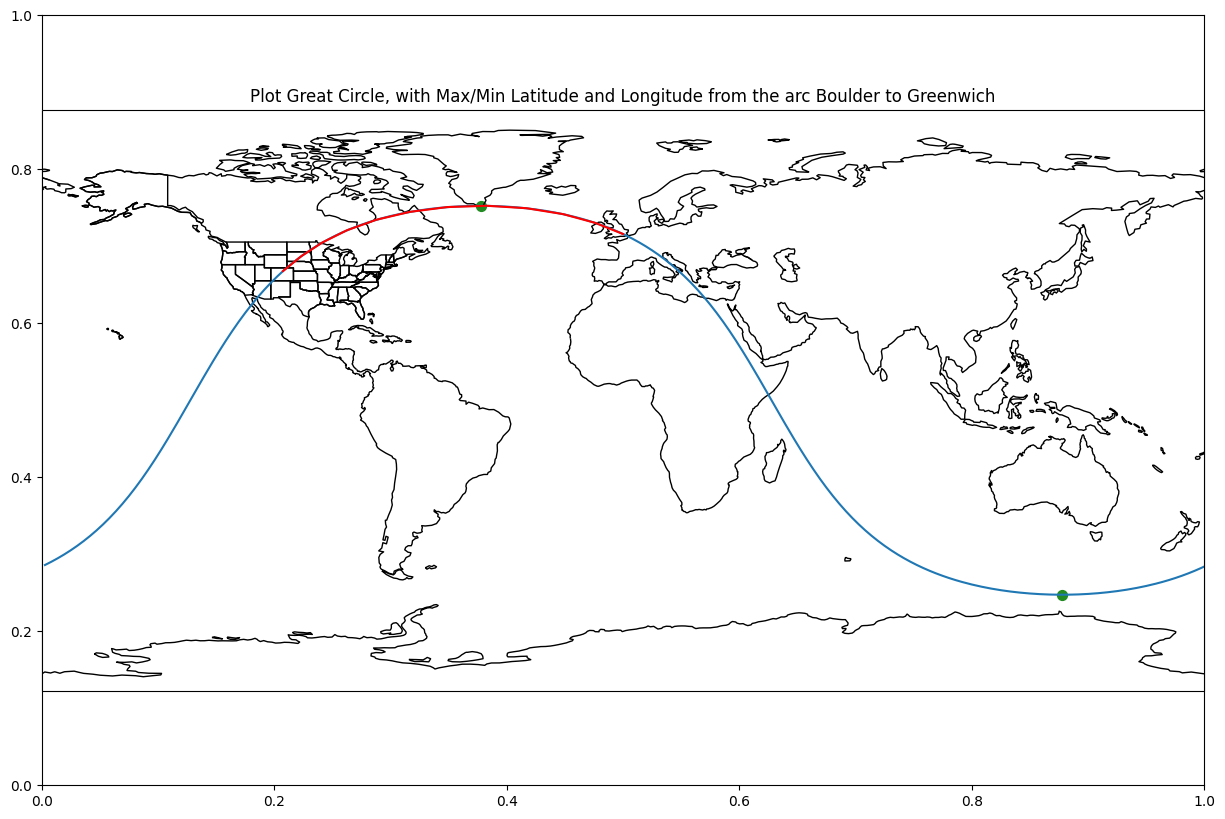

In [1074]:
greenwich_lat_lon = (51.49, 0.0098)
new_point_lat_lon = greenwich_lat_lon
new_point_coords = return_all_coords(new_point_lat_lon[0], new_point_lat_lon[1])

max_coords, min_coords = find_max_min_latitude_gc(boulder_coords, new_point_coords)
lat_pts = generate_latitude_along_gc(boulder_coords, new_point_coords, lon_pts)
plot_coordinate_max_min(lat_pts, lon_pts,
                        boulder_coords, new_point_coords,
                        max_coords, min_coords,
                f"Plot Great Circle, with Max/Min Latitude and Longitude from the arc Boulder to Greenwich")

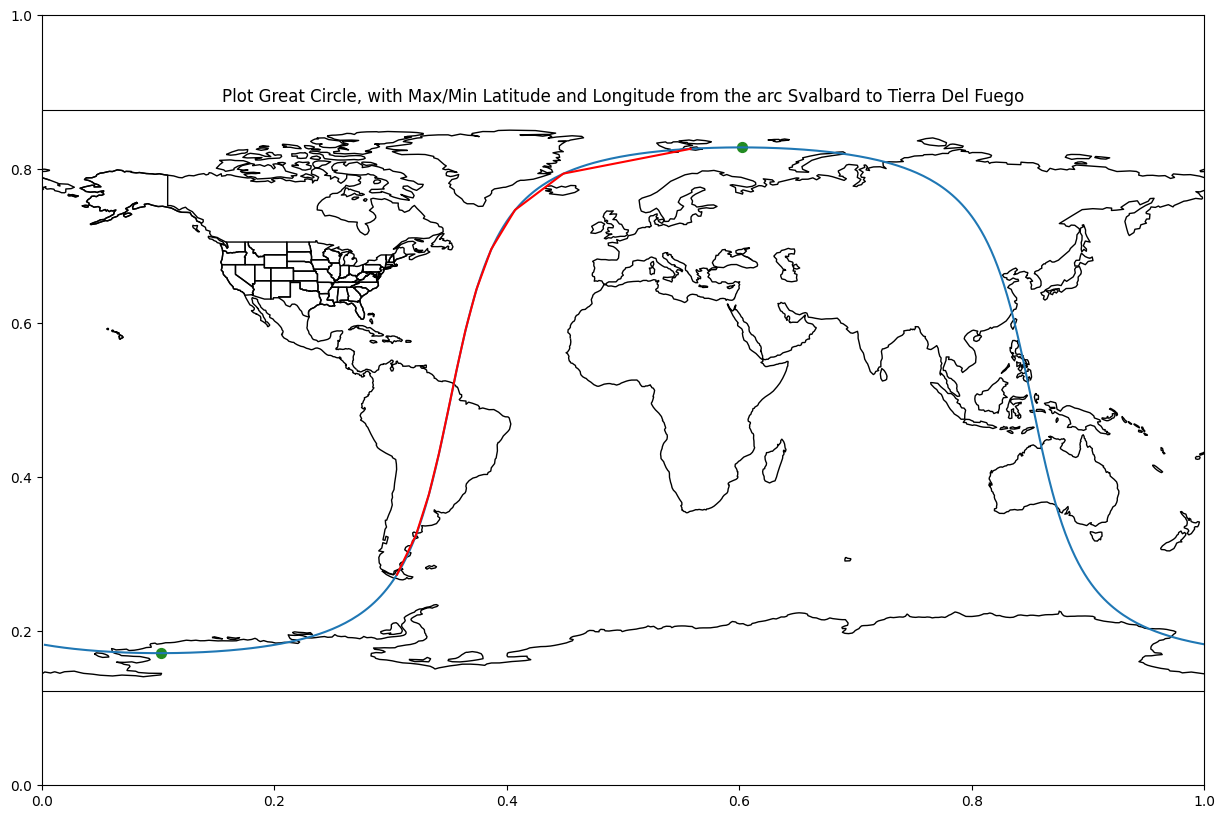

In [1075]:
svalbard_lat_lon = (77.88, 20.98)
svalbard_lat_lon_coords = return_all_coords(svalbard_lat_lon[0], svalbard_lat_lon[1])
tierradelfuego_lat_lon = (-54.0, -70)
tierradelfuego_lat_lon_coords = return_all_coords(tierradelfuego_lat_lon[0], tierradelfuego_lat_lon[1])

max_coords, min_coords = find_max_min_latitude_gc(svalbard_lat_lon_coords, tierradelfuego_lat_lon_coords)
lat_pts = generate_latitude_along_gc(svalbard_lat_lon_coords, tierradelfuego_lat_lon_coords, lon_pts)
plot_coordinate_max_min(lat_pts, lon_pts,
                        svalbard_lat_lon_coords, tierradelfuego_lat_lon_coords,
                        max_coords, min_coords,
                f"Plot Great Circle, with Max/Min Latitude and Longitude from the arc Svalbard to Tierra Del Fuego")

### TODO: Compare with Clairaut's Formula

- Closet point to the poles: Clairaut’s formula’ will give you the maximum latitude of a great circle path, given a bearing θ and latitude φ on the great circle
```
max_lat = np.arccos(np.abs(np.sin(bearing)*Math.cos(latitude)))
```
- Midpoint between points along a great-circle arc: half-way point along a great circle path between the two points
```
# All angles in radians
Bx = Math.cos(φ2) * Math.cos(λ2-λ1)
By = Math.cos(φ2) * Math.sin(λ2-λ1)
φ3 = Math.atan2(Math.sin(φ1) + Math.sin(φ2), Math.sqrt( (Math.cos(φ1)+Bx)*(Math.cos(φ1)+Bx) + By*By ) )
λ3 = λ1 + Math.atan2(By, Math.cos(φ1) + Bx)
```
- Points(s) known distance from a great circle: Let points A and B define a great circle route and D be a third point. Find the points on the great circle through A and B that lie a distance d from D, if they exist
```
# crs_AB and crs_AD are the initial GC bearings from A to B and D, respectively
A = crs_AD - crs_AB
```

References
- [Moving Type Script](http://www.movable-type.co.uk/scripts/latlong.html)

##  gc_aangle: Finds the acute angle between two great circles on the globe

### Determine the Intersection of Two Great Cirlce Paths

In [1076]:
# potentially: https://uxarray.readthedocs.io/en/latest/user_api/generated/uxarray.grid.intersections.gca_gca_intersection.html
# intersection of two great circles
# https://stackoverflow.com/questions/15008394/python-calculate-point-of-intersection-of-two-great-circles
# http://www.boeing-727.com/Data/fly%20odds/distance.html
def intersection_of_gc(start_gc1=None, end_gc1=None,
                      start_gc2=None, end_gc2=None):
    # get normal of planes containing great cirlces
    # cross product of vectors
    normal_one = np.cross([start_gc1["cart_x"],
                           start_gc1["cart_y"],
                           start_gc1["cart_z"]],
                          [end_gc1["cart_x"],
                           end_gc1["cart_y"],
                           end_gc1["cart_z"]])
    normal_two = np.cross([start_gc2["cart_x"],
                           start_gc2["cart_y"],
                           start_gc2["cart_z"]],
                          [end_gc2["cart_x"],
                           end_gc2["cart_y"],
                           end_gc2["cart_z"]])
    # intersection of planes, normal to the poles of each plane
    line_of_intersection = np.cross(normal_one, normal_two)
    # intersection points (one on each side of the earth)
    x1 = line_of_intersection /  np.sqrt(line_of_intersection[0]**2 + line_of_intersection[1]**2 + line_of_intersection[2]**2) 
    x2 = -x1
    lat1 = np.rad2deg(np.arctan2(x1[2], np.sqrt(pow(x1[0],2)+pow(x1[1],2))))
    lon1 = np.rad2deg(np.arctan2(x1[1], x1[0]))
    lat2 = np.rad2deg(np.arctan2(x2[2], np.sqrt(pow(x2[0],2)+pow(x2[1],2))))
    lon2 = np.rad2deg(np.arctan2(x2[1], x2[0]))
    return [(lat1, lon1), (lat2, lon2)]


In [1077]:
def plot_gc_with_intersection(gc_one_p1=None, gc_one_p2=None,
                              gc_two_p1=None, gc_two_p2=None,
                             intersection_point=None,
                             lon_west=-180, lon_east=180,
                             lat_south=-90, lat_north=90):
    #plt.style.use('dark_background')
    # Set up world map plot
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.STATES, edgecolor="black")

    # Plot Great Circle Path
    lon_pts = generate_longitude_along_gc(360)
    gc_one_lat_pts = generate_latitude_along_gc(gc_one_p1, gc_one_p2, lon_pts)
    gc_two_lat_pts = generate_latitude_along_gc(gc_two_p1, gc_two_p2, lon_pts)
    plt.plot(lon_pts, gc_one_lat_pts)
    plt.plot(lon_pts, gc_two_lat_pts)

    # plot intersection point
    longitudes = [x[1] for x in intersection_point] # longitude
    latitudes = [x[0] for x in intersection_point] # latitude
    plt.scatter(longitudes, latitudes, s=200, c="purple")

    # Plot Great Circle Arc
    gc_one_arc_pts = arc_points(start_lat=gc_one_p1["latitude"],
                               start_lon=gc_one_p1["longitude"],
                               end_lat=gc_one_p2["latitude"],
                               end_lon=gc_one_p2["longitude"])
    gc_two_arc_pts = arc_points(start_lat=gc_two_p1["latitude"],
                               start_lon=gc_two_p1["longitude"],
                               end_lat=gc_two_p2["latitude"],
                               end_lon=gc_two_p2["longitude"])
    longitudes = [x[1] for x in gc_one_arc_pts] # longitude
    latitudes = [x[0] for x in gc_one_arc_pts] # latitude
    plt.plot(longitudes, latitudes, c="pink")
    plt.scatter(longitudes[0], latitudes[0], s=100, c="green")
    plt.scatter(longitudes[-1], latitudes[-1],s=100, c="red")
    longitudes = [x[1] for x in gc_two_arc_pts] # longitude
    latitudes = [x[0] for x in gc_two_arc_pts] # latitude
    plt.scatter(longitudes[0], latitudes[0],s=100, c="green")
    plt.scatter(longitudes[-1], latitudes[-1],s=100, c="red")
    plt.plot(longitudes, latitudes, c="green")

    plt.title(f"Intersection Point = {intersection_point}")
    plt.show()

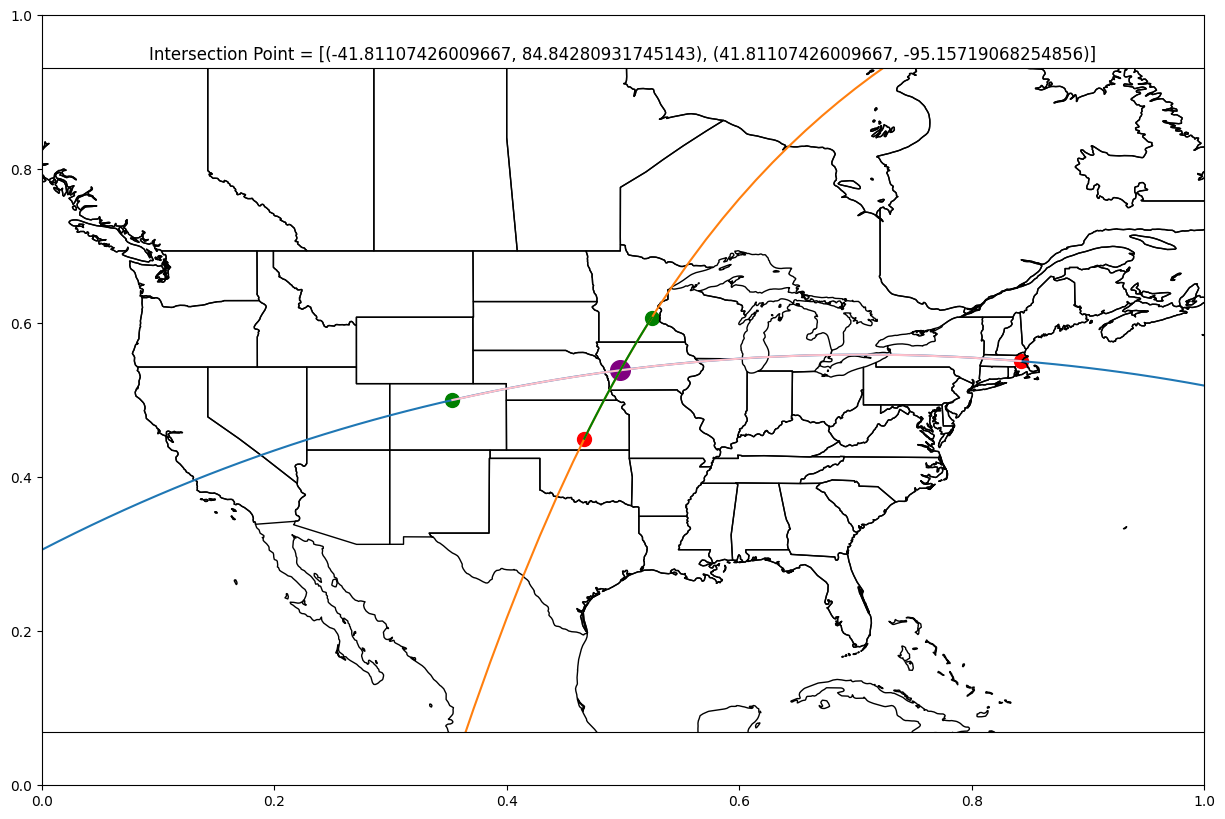

In [1078]:
minneapolis_lat_lon = (44.98, -93.27)
minneapolis_coords = return_all_coords(minneapolis_lat_lon[0], minneapolis_lat_lon[1])

intersect_pt = intersection_of_gc(boulder_coords, boston_coords,
                                minneapolis_coords, wichita_coords)
plot_gc_with_intersection(boulder_coords, boston_coords,
                        minneapolis_coords, wichita_coords,
                        intersect_pt, -130, -60, 20, 60)

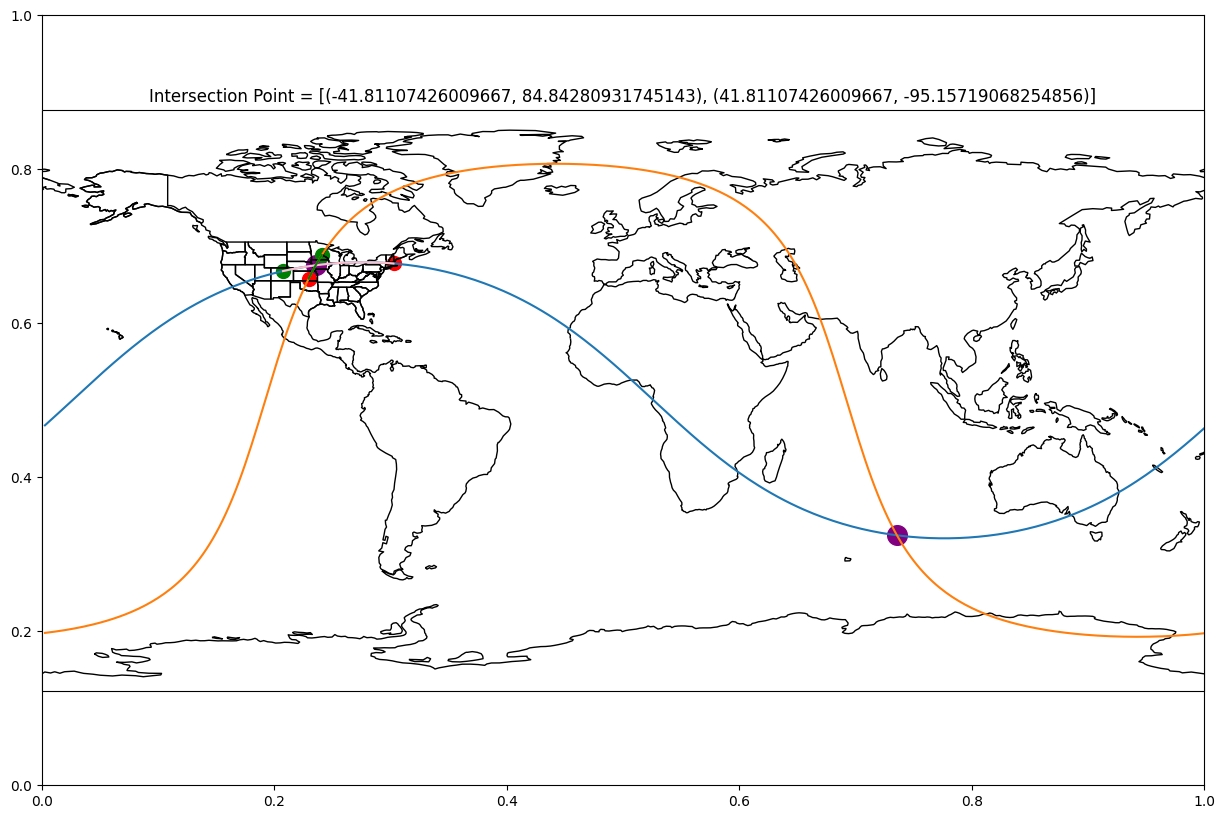

In [1079]:
minneapolis_lat_lon = (44.98, -93.27)
minneapolis_coords = return_all_coords(minneapolis_lat_lon[0], minneapolis_lat_lon[1])

intersect_pt = intersection_of_gc(boulder_coords, boston_coords,
                                minneapolis_coords, wichita_coords)
plot_gc_with_intersection(boulder_coords, boston_coords,
                        minneapolis_coords, wichita_coords,
                        intersect_pt)

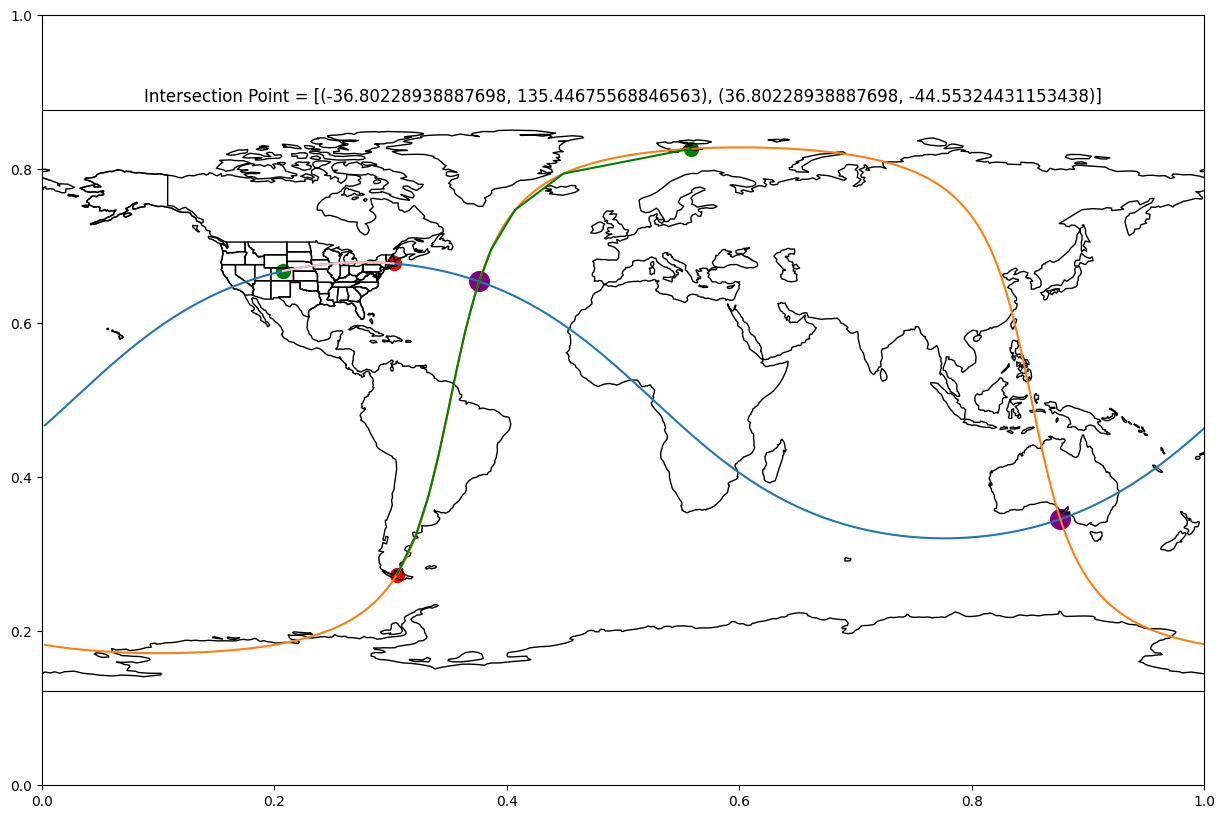

In [1080]:
intersect_pt = intersection_of_gc(boulder_coords, boston_coords,
                                svalbard_lat_lon_coords, tierradelfuego_lat_lon_coords)
plot_gc_with_intersection(boulder_coords, boston_coords,
                        svalbard_lat_lon_coords, tierradelfuego_lat_lon_coords,
                        intersect_pt)

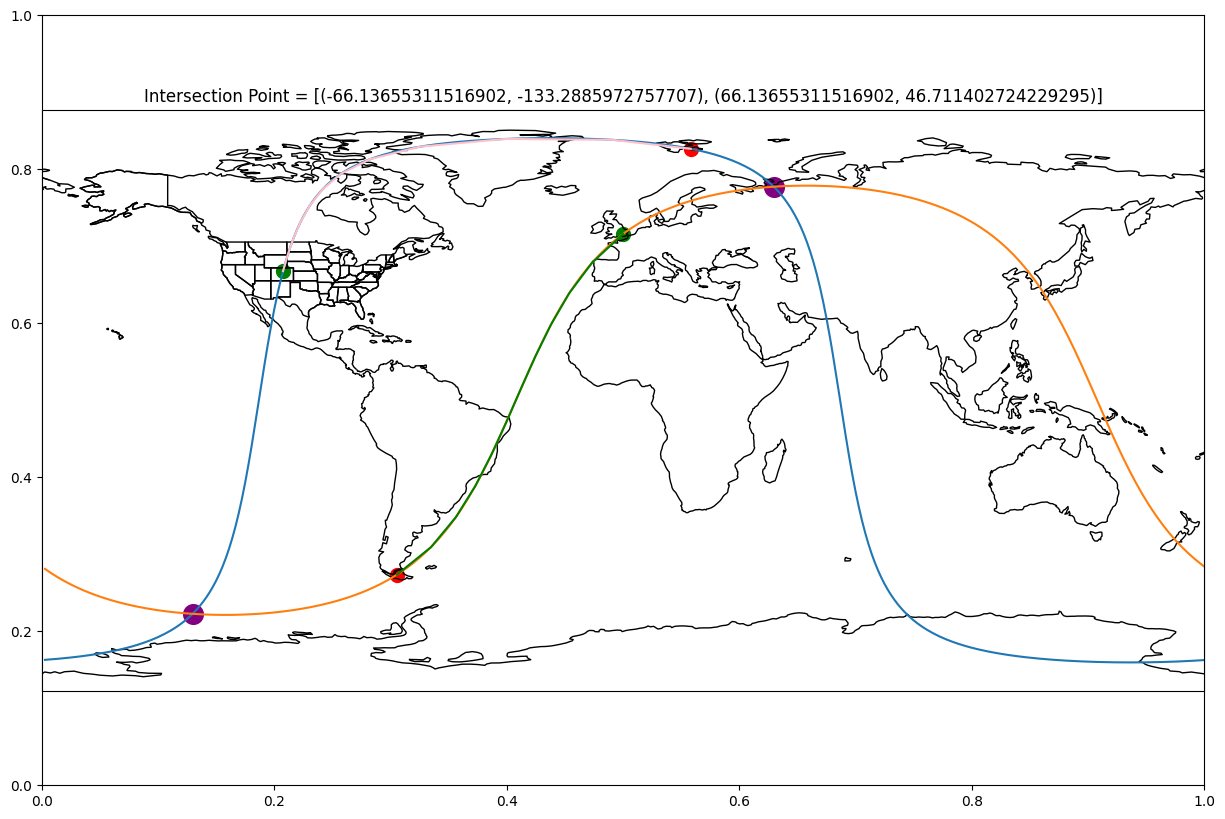

In [1081]:
greenwich_lat_lon = (51.49, 0.0098)
greenwich_coords = return_all_coords(greenwich_lat_lon[0], greenwich_lat_lon[1])

intersect_pt = intersection_of_gc(boulder_coords, svalbard_lat_lon_coords,
                                greenwich_coords, tierradelfuego_lat_lon_coords)
plot_gc_with_intersection(boulder_coords, svalbard_lat_lon_coords,
                        greenwich_coords, tierradelfuego_lat_lon_coords,
                        intersect_pt)


### Angle Between Arc/Planes

#### TODO: note will fail when great cirlce through the poles and at the equator (90)

In [1082]:
# https://gis.stackexchange.com/questions/474171/angle-between-2-arc-of-circle-on-a-sphere
# https://personal.math.ubc.ca/~cass/courses/m308-02b/projects/franco/index.htm
# Van Brummelen, Glen (2012). Heavenly Mathematics: The Forgotten Art of Spherical Trigonometry
def angle_between_arcs(start_gc1=None, end_gc1=None,
                       start_gc2=None, end_gc2=None):
    # get normal of planes containing great cirlces
    normal_one = np.cross([start_gc1["cart_x"],
                           start_gc1["cart_y"],
                           start_gc1["cart_z"]],
                          [end_gc1["cart_x"],
                           end_gc1["cart_y"],
                           end_gc1["cart_z"]])
    normal_two = np.cross([start_gc2["cart_x"],
                           start_gc2["cart_y"],
                           start_gc2["cart_z"]],
                          [end_gc2["cart_x"],
                           end_gc2["cart_y"],
                           end_gc2["cart_z"]])
    # dot product to obtain the angle bewteen the normal planes
    angle_between_planes = np.dot(normal_one, normal_two)
    # divide by the magnitude of the vectors, inverse of cos to find angle
    angle = np.arccos(np.dot(normal_one, normal_two) / 
                    (np.linalg.norm(normal_one) * np.linalg.norm(normal_two)))
    obtuse_acute_angle = (np.rad2deg(angle), ((360-(2*np.rad2deg(angle)))/2))
    print(obtuse_acute_angle)
    acute_angle = np.min(obtuse_acute_angle)
    obtuse_angle = np.max(obtuse_acute_angle)
    print(f"Acute Angle  = {acute_angle}")
    print(f"Obtuse Angle = {obtuse_angle}")
    return obtuse_acute_angle


In [1083]:
## NCL Test: SHOULD BE 17.20756
a_start_coords = return_all_coords(22, 40)
a_end_coords = return_all_coords(40, 50)
b_start_coords = return_all_coords(22, 40)
b_end_coords = return_all_coords(10, 30)

acute_angle = angle_between_arcs(a_start_coords, a_end_coords, 
                   b_start_coords, b_end_coords)
np.isclose(np.min(acute_angle), 17.20756)

(162.79244199207616, 17.207558007923836)
Acute Angle  = 17.207558007923836
Obtuse Angle = 162.79244199207616


True

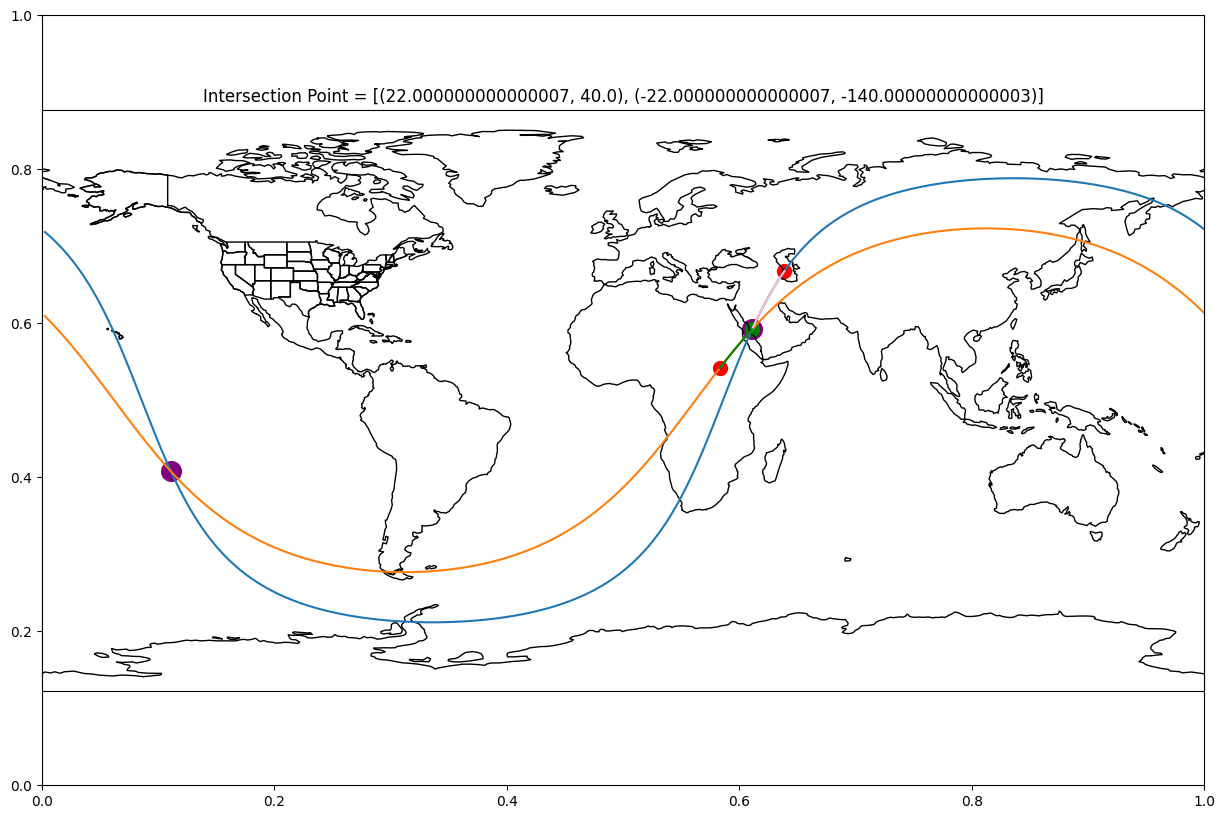

In [1084]:
intersect_pt = intersection_of_gc(a_start_coords, a_end_coords,
                                b_start_coords, b_end_coords)
plot_gc_with_intersection(a_start_coords, a_end_coords,
                        b_start_coords, b_end_coords,
                        intersect_pt)

In [1085]:
houston_lat_lon = (29.76, -95.37) # NASA
houston_coords = return_all_coords(houston_lat_lon[0], houston_lat_lon[1])
greenwich_lat_lon = (51.49, 0.0098)
greenwich_coords = return_all_coords(greenwich_lat_lon[0], greenwich_lat_lon[1])

acute_angle = angle_between_arcs(boulder_coords, boston_coords, 
                   houston_coords, greenwich_coords)

(40.07375222499113, 139.92624777500887)
Acute Angle  = 40.07375222499113
Obtuse Angle = 139.92624777500887


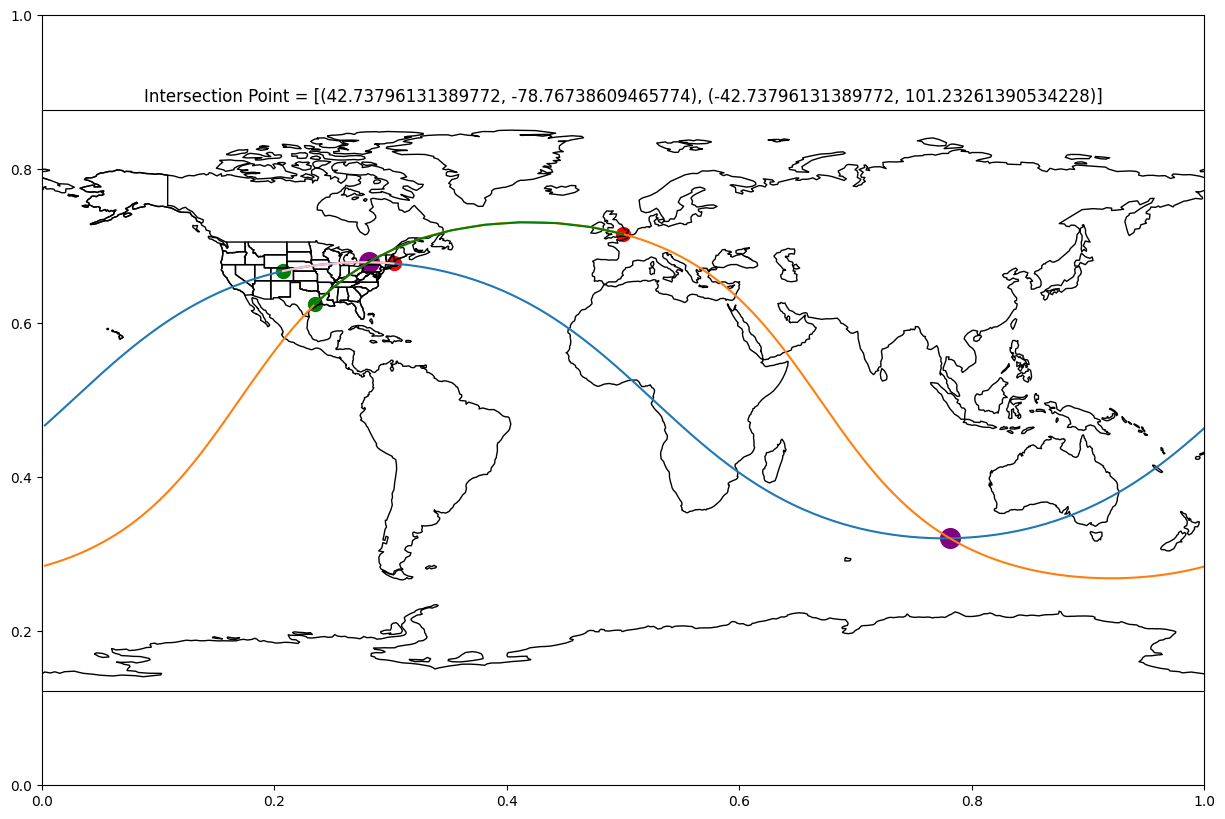

In [1086]:
intersect_pt = intersection_of_gc(boulder_coords, boston_coords, 
                   houston_coords, greenwich_coords)
plot_gc_with_intersection(boulder_coords, boston_coords, 
                   houston_coords, greenwich_coords,
                    intersect_pt)

## gc_dangle: Finds the directed angle between two great circles having a specified intersection point

- Input: Rightmost dimension size must be three for vertices of three points defning arcs and an interesection point ( where A=(lat[0],lon[0]), B=(lat[1],lon[1]), and C=(lat[2],lon[2]), AB and AC define arcs of great circles that intersect at A)
- Finds the directed angle between two great circles defined by three points: A, B, C where A->B and A->C are arcs on the great circle (where A is where the arcs intersect)
- Returns an angle in degrees between the great circles defined by arcs
- Returned angle is `positive` if C is to the left of the great circles A->B
- Returned angle is `negative` if C is to the right of the great circles A->B

### Directed Angles

> Definition 2.1: Given any two non-parallel lines L and M, we define the directed angle ∠(L,M) to be measured of an angle STARTING from L and ENDING at M, measured COUNTERCLOCKWISE, where
```
∠(L,M) + ∠(M,L) = 180 degres
```
> Where all angles are measured modulo 180 (-70 = 110 = 290) (via `mod 180`)

> Proposition 2.2: For any lines L and M, then ∠(L,M) = -∠(M,L) (in other words, measuring the angle clockwise instead of counterclockwise corresponds to negation)

 ```
∠AOB notation for points A, B and an intersection point O
```

Directed angle moves from the inital side, counterclockwise, to the terminal side. From A->B to arc formed by point C (arc A->C)
 ```
∠AOB = (OA, OB)
∠BAC = (AB, AC)
∠CAB = (AC, AB)

```
> Directed angle is in the standard position if it satistfies two conditions:
> - Its vertex is the origin of rectangular coordinates system
> - Its initial side lies on the postive direction of the x-axis

> The directed angle resulting from an anticlockwise rotation has a postive measure

> The directed angle resulting from a clockwise rotation has a negative measure
- [How to Use Directed Angles](https://web.evanchen.cc/handouts/Directed-Angles/Directed-Angles.pdf)
- [Slides](https://www.slideshare.net/slideshow/1-directed-angle/201011046)

In [1087]:
def plot_gc_directed_angle(a_coords=None, b_coords=None,c_coords=None,
                           direction=None,
                         lon_west=-180, lon_east=180,
                         lat_south=-90, lat_north=90):
    # A = intersect point
    # A->B and A->C where C is the angle to determine sign

    #plt.style.use('dark_background')
    # Set up world map plot
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.STATES, edgecolor="black")

    # Plot Great Circle Path
    lon_pts = generate_longitude_along_gc(360)
    gc_one_lat_pts = generate_latitude_along_gc(a_coords, b_coords, lon_pts)
    gc_two_lat_pts = generate_latitude_along_gc(a_coords, c_coords, lon_pts)
    plt.plot(lon_pts, gc_one_lat_pts)
    plt.plot(lon_pts, gc_two_lat_pts)

    # Plot Great Circle Arc
    gc_one_arc_pts = arc_points(start_lat=a_coords["latitude"],
                               start_lon=a_coords["longitude"],
                               end_lat=b_coords["latitude"],
                               end_lon=b_coords["longitude"])
    gc_two_arc_pts = arc_points(start_lat=a_coords["latitude"],
                               start_lon=a_coords["longitude"],
                               end_lat=c_coords["latitude"],
                               end_lon=c_coords["longitude"])
    longitudes = [x[1] for x in gc_one_arc_pts] # longitude
    latitudes = [x[0] for x in gc_one_arc_pts] # latitude
    plt.plot(longitudes, latitudes, c="pink")
    longitudes = [x[1] for x in gc_two_arc_pts] # longitude
    latitudes = [x[0] for x in gc_two_arc_pts] # latitude
    plt.plot(longitudes, latitudes, c="green")

    # plot A, B, C points in different colors
    fz = 30
    offset = 3
    plt.scatter(a_coords["longitude"], a_coords["latitude"], s=100, c="red", label="A")
    ax.annotate("A", (a_coords["longitude"]+offset, a_coords["latitude"]+offset), fontsize=fz)
    plt.scatter(b_coords["longitude"], b_coords["latitude"], s=100, c="blue", label="B")
    ax.annotate("B", (b_coords["longitude"]-(4*offset), b_coords["latitude"]-offset), fontsize=fz)
    plt.scatter(c_coords["longitude"], c_coords["latitude"], s=100, c="cyan", label="C")
    ax.annotate("C", (c_coords["longitude"]+offset, c_coords["latitude"]+offset), fontsize=fz)
    ax.quiver(b_coords["longitude"],
              b_coords["latitude"], 
              (c_coords["longitude"]-b_coords["longitude"]), 
              (c_coords["latitude"]-b_coords["latitude"]), 
              angles='xy', scale_units='xy', scale=1)    
    
    if direction > 0: 
        sign = "Counterclockwise"
    if direction < 0: 
        sign = "Clockwise"
    if direction == 0:
        sign = "Colinear"
    plt.title(f"Direction = {sign}, {direction}")
    plt.legend()
    plt.show()

In [1088]:
def directed_angle(b_coords=None, c_coords=None, a_coords=None):
    # B=gc1=end_gc1, C=gc2=end_gc2, A=intersect=start_gc1=start_gc2
    # get normal of planes containing great cirlces
    normal_one = np.cross([a_coords["cart_x"],
                           a_coords["cart_y"],
                           a_coords["cart_z"]],
                          [b_coords["cart_x"],
                           b_coords["cart_y"],
                           b_coords["cart_z"]])
    normal_two = np.cross([a_coords["cart_x"],
                           a_coords["cart_y"],
                           a_coords["cart_z"]],
                          [c_coords["cart_x"],
                           c_coords["cart_y"],
                           c_coords["cart_z"]])
    # dot product to obtain the angle bewteen the normal planes
    angle_between_planes = np.dot(normal_one, normal_two)
    # divide by the magnitude of the vectors, inverse of cos to find angle
    angle = np.arccos(np.dot(normal_one, normal_two) / 
                    (np.linalg.norm(normal_one) * np.linalg.norm(normal_two)))
    angle = np.rad2deg(angle)

    # take the cross product of two vectors A->B and A->C
    v_ab = np.array([[a_coords["cart_x"],
                    a_coords["cart_y"],
                    a_coords["cart_z"]],
                    [b_coords["cart_x"],
                    b_coords["cart_y"],
                    b_coords["cart_z"]]])
    v_ac = np.array([[a_coords["cart_x"],
                     a_coords["cart_y"],
                    a_coords["cart_z"]],
                    [c_coords["cart_x"],
                    c_coords["cart_y"],
                    c_coords["cart_z"]]])

    cross_prod = np.cross(v_ab, v_ac)
    # inverse of the sign of the cross product
    sign_angle = -1*np.sign(cross_prod[1][-1]) * angle
    return sign_angle

In [1089]:
# NCL test: SHOULD RETURN 105.629
lat = (-20, 40, -60)
lon = (30, -40, -80)

# Arcs defined as A->B and A->C

a_coords = return_all_coords(lat[0], lon[0]) # intersect at A
b_coords = return_all_coords(lat[1], lon[1])
c_coords = return_all_coords(lat[2], lon[2])

direction_angle = directed_angle(c_coords=c_coords,
                                 b_coords=b_coords,
                                 a_coords=a_coords)
print(direction_angle)
assert np.isclose(direction_angle, 105.629)

105.62898225413558


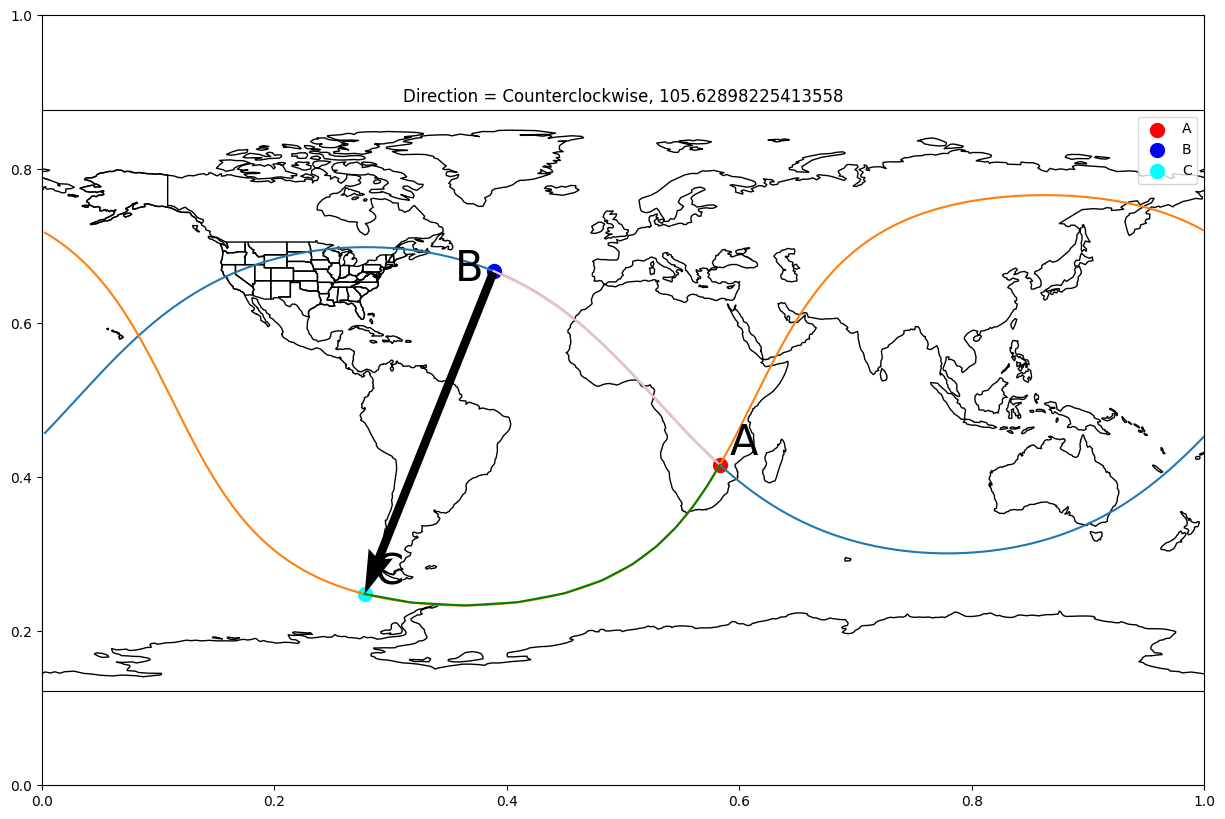

In [1090]:
plot_gc_directed_angle(a_coords=a_coords,
                       b_coords=b_coords,
                       c_coords=c_coords,
                       direction=direction_angle)

In [1091]:
# NCL test: SHOULD RETURN -80.26003
lat = (0, 1, 45)
lon = (0, -1, 45)

a_coords = return_all_coords(lat[0], lon[0]) # intersect at A
b_coords = return_all_coords(lat[1], lon[1])
c_coords = return_all_coords(lat[2], lon[2])

direction_angle = directed_angle(c_coords=c_coords,
                                 b_coords=b_coords,
                                 a_coords=a_coords)
print(direction_angle)
assert np.isclose(direction_angle, -80.26003)

-80.2600261380995


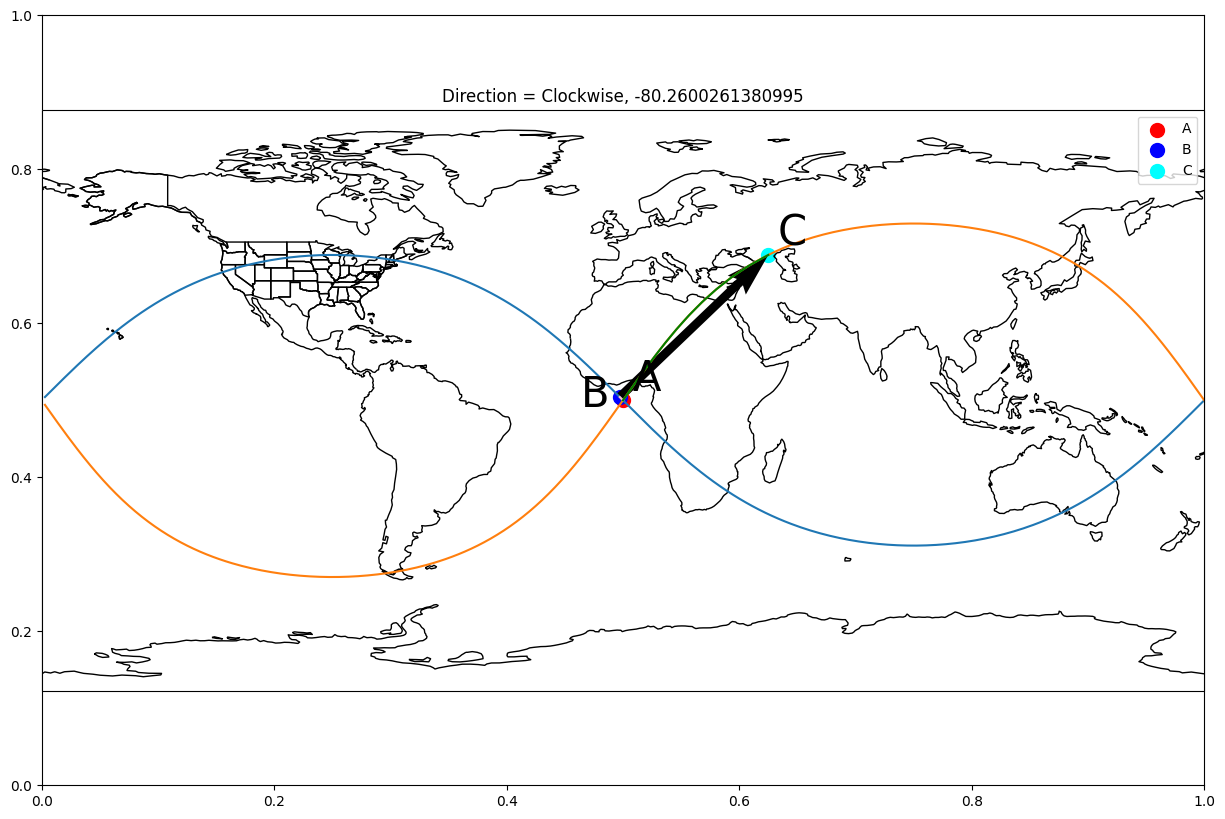

In [1092]:
plot_gc_directed_angle(a_coords=a_coords,
                       b_coords=b_coords,
                       c_coords=c_coords,
                       direction=direction_angle)

In [1093]:
# NCL test: SHOULD RETURN 134.5614514132577
lat = (0, 0, 10)
lon = (0, 10, -10)

# Arcs defined as A->B and A->C

a_coords = return_all_coords(lat[0], lon[0]) # intersect at A
b_coords = return_all_coords(lat[1], lon[1])
c_coords = return_all_coords(lat[2], lon[2])

direction_angle = directed_angle(c_coords=c_coords,
                                 b_coords=b_coords,
                                 a_coords=a_coords)
print(direction_angle)
assert np.isclose(direction_angle, 134.5614514132577)

134.5614514132577


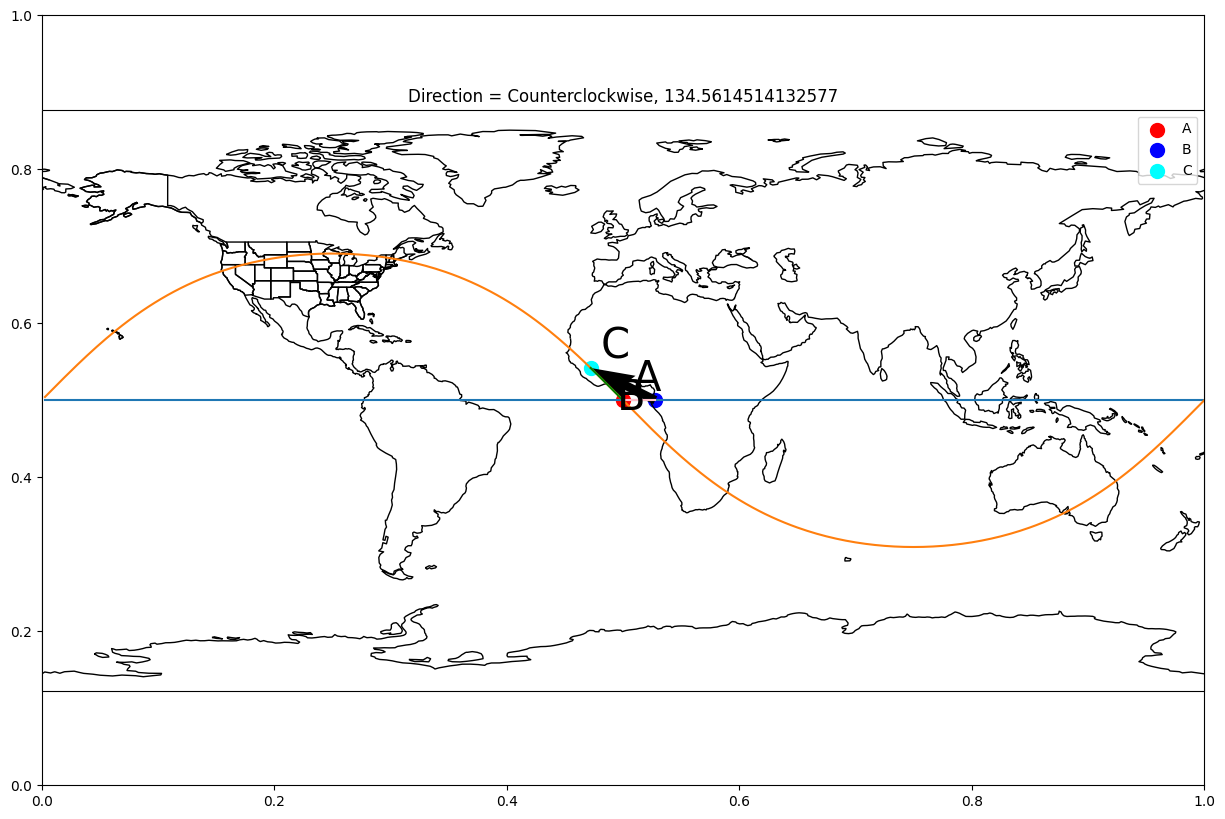

In [1094]:
plot_gc_directed_angle(a_coords=a_coords,
                       b_coords=b_coords,
                       c_coords=c_coords,
                       direction=direction_angle)

In [1095]:
# NCL test: SHOULD RETURN 90
lat = (0, 0, 10)
lon = (0, 10, 0)

a_coords = return_all_coords(lat[0], lon[0]) # intersect at A
b_coords = return_all_coords(lat[1], lon[1])
c_coords = return_all_coords(lat[2], lon[2])

direction_angle = directed_angle(c_coords=c_coords,
                                 b_coords=b_coords,
                                 a_coords=a_coords)
print(direction_angle)
assert np.isclose(direction_angle, 90)

90.0


Invalid inputs: start/end points are meridians
TODO: Fix for plotting meridians


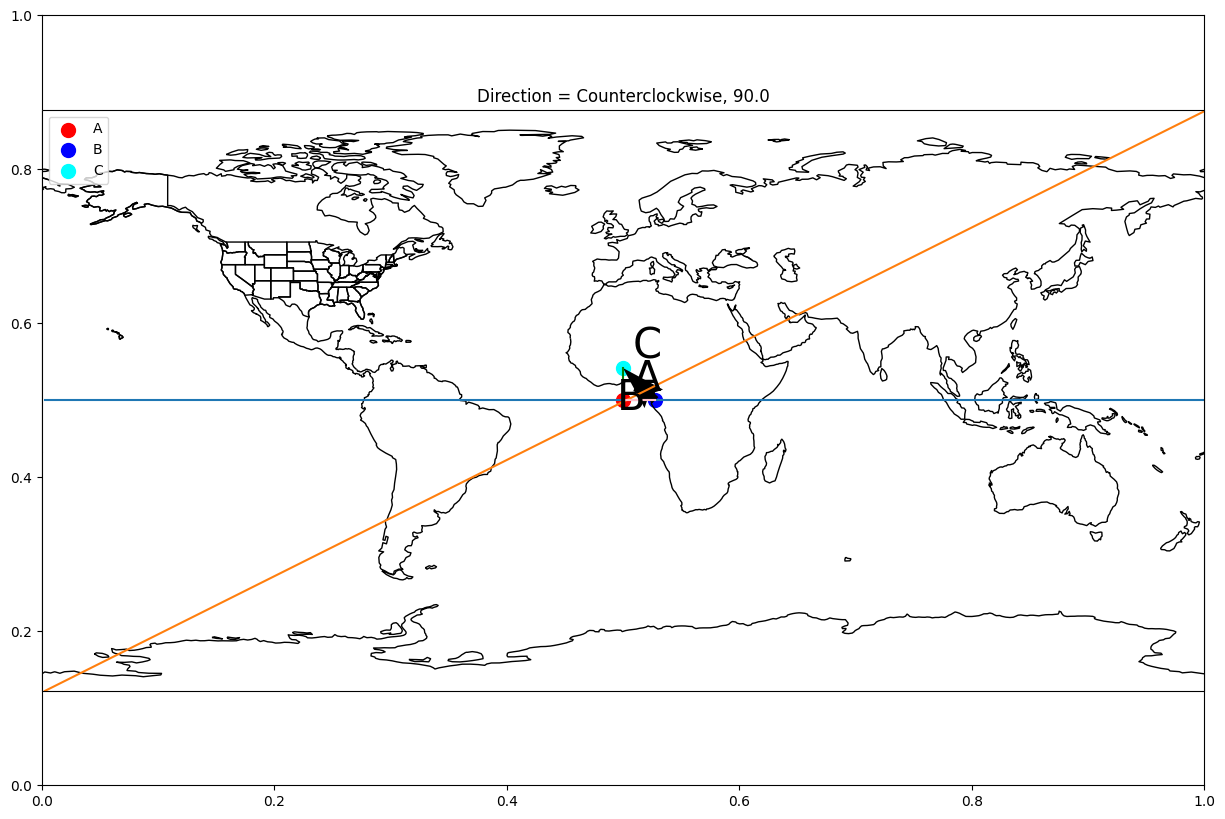

In [1096]:
plot_gc_directed_angle(a_coords=a_coords,
                       b_coords=b_coords,
                       c_coords=c_coords,
                       direction=direction_angle)

In [1097]:
# Expected NCLL Output: -122.6297
intersect_pt = intersection_of_gc(boulder_coords, boston_coords,
                                minneapolis_coords, wichita_coords)

a_coords = return_all_coords(intersect_pt[1][0], intersect_pt[1][1]) # intersect at A

print(a_coords["latitude"], boulder_coords["latitude"], minneapolis_coords["latitude"])
print(a_coords["longitude"], boulder_coords["longitude"], minneapolis_coords["longitude"])
"""
Compare with NCL
lat = (/41.81107426009667, 40.015, 44.98/)
lon = (/-95.15719068254856, -105.2705, -93.27/)
angles = gc_dangle(lat, lon)
print(angles)
"""

direction_angle = directed_angle(a_coords=a_coords,
                                 b_coords=boulder_coords,
                                c_coords=minneapolis_coords)
print(direction_angle)
assert np.isclose(direction_angle, -122.6297)

41.81107426009667 40.015 44.98
-95.15719068254856 -105.2705 -93.27
-122.62974106490344


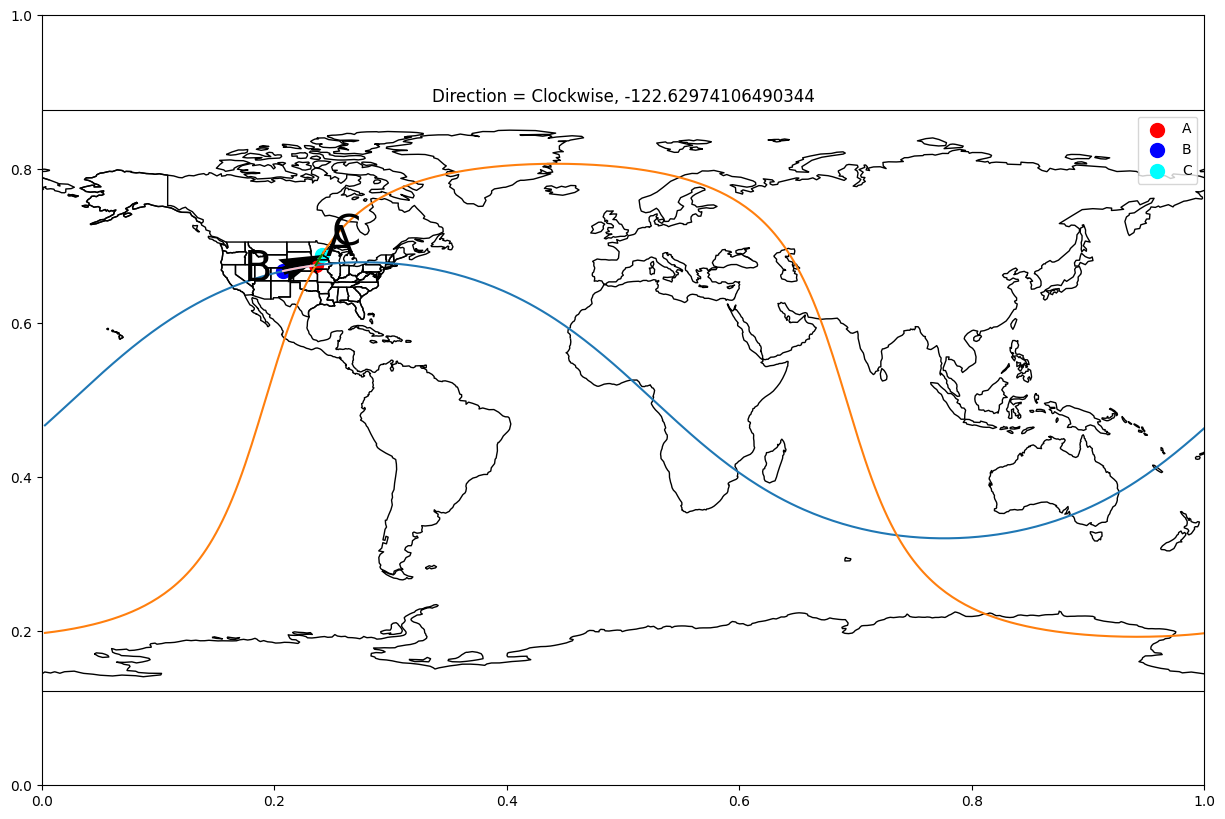

In [1098]:
plot_gc_directed_angle(c_coords=minneapolis_coords,
                                 b_coords=boulder_coords,
                                 a_coords=a_coords,
                       direction=direction_angle)

In [1099]:
# Expected NCLL Output: 29.78238
intersect_pt = intersection_of_gc(svalbard_lat_lon_coords, boulder_coords,
                    minneapolis_coords, wichita_coords)

a_coords = return_all_coords(intersect_pt[0][0], intersect_pt[0][1]) # intersect at A

print(a_coords["latitude"], svalbard_lat_lon_coords["latitude"], greenwich_coords["latitude"])
print(a_coords["longitude"], svalbard_lat_lon_coords["longitude"], greenwich_coords["longitude"])
"""
Compare with NCL
lat = (/13.27421547438754, 77.88, 51.49/)
lon = (/65.14672682882181, 20.98, 0.0098/)
angles = gc_dangle(lat, lon)
print(angles)
"""

direction_angle = directed_angle(a_coords=a_coords, 
                                  b_coords=svalbard_lat_lon_coords,
                                c_coords=greenwich_coords)
print(direction_angle)
assert np.isclose(direction_angle, 29.78238)

13.27421547438754 77.88 51.49
65.14672682882181 20.98 0.0098
29.782386716863947


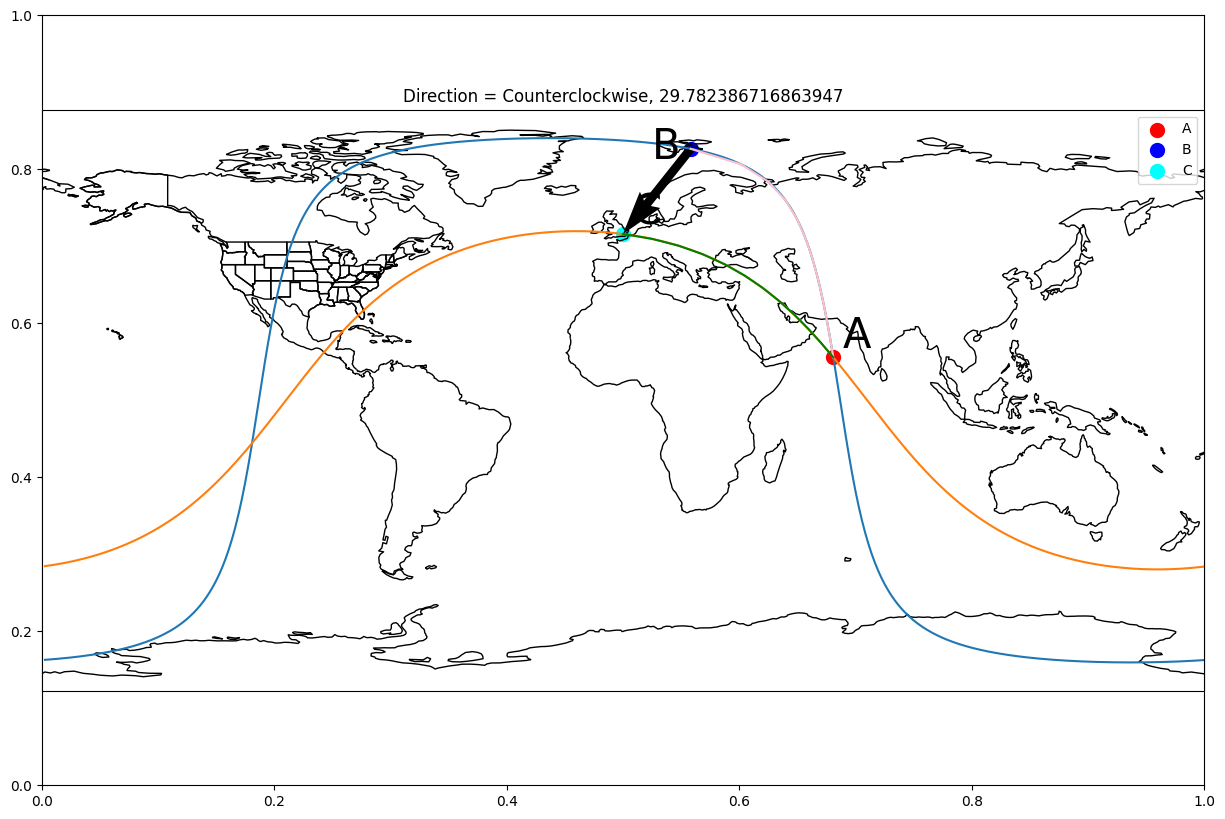

In [1100]:
plot_gc_directed_angle(a_coords=a_coords, 
                    b_coords=svalbard_lat_lon_coords,
                    c_coords=greenwich_coords,
                       direction=direction_angle)

## gc_clkwise: Tests clockwise/counterclockwise ordering of points on spherical polygon

```
;  Closed diamond shape, clockwise ordering.
;
lat = (/ 0.0,  1.0,  0.0, -1.0,  0.0/)
lon = (/-3.0, -2.0, -1.0, -2.0, -3.0/)
order = gc_clkwise(lat, lon)
print(order)
>>> True
```
- True: Input points are entered in a clockwise direction
- False: Input points are entered in a counterclockwise direction

In [1101]:
def plot_clockwise(pt_lst=None, are_pts_clockwise=None):
    fig,ax = plt.subplots(figsize=(15, 10))

    # plot arrow between points in order
    for i, pt in enumerate(pt_lst):
        if i+1 < len(pt_lst):
            ax.quiver(pt_lst[i+1]["longitude"],
                      pt_lst[i+1]["latitude"], 
                      (pt_lst[i]["longitude"]-pt_lst[i+1]["longitude"]), 
                      (pt_lst[i]["latitude"]-pt_lst[i+1]["latitude"]), 
                      angles='xy', scale_units='xy', scale=1)   
   # plot points
    longitudes = [x["longitude"] for x in pt_lst] # longitude
    latitudes = [x["latitude"] for x in pt_lst] # latitude
    plt.scatter(longitudes, latitudes, c="red")
    if are_pts_clockwise:
        clockwise = "Clockwise"
    if not are_pts_clockwise:
        clockwise = "Counterclockwise"
    plt.title(clockwise)
    plt.show()

In [1102]:
# shoelace formula, signed area
# https://scikit-spatial.readthedocs.io/en/stable/api_reference/measurement/functions/skspatial.measurement.area_signed.html
# https://stackoverflow.com/questions/14505565/detect-if-a-set-of-points-in-an-array-that-are-the-vertices-of-a-complex-polygon
def is_clockwise(pt_lst=None):
    # signed polygon area -> shoelace formula
    # postive = counterclockwise, negative = clockwise
    area = 0
    for i in range(0, len(pt_lst)):
        if i+1 < len(pt_lst):
            area += pt_lst[i]["latitude"] * pt_lst[i+1]["longitude"]
            area -= pt_lst[i+1]["latitude"]  * pt_lst[i]["longitude"]
        #area /= 2 # determine full sign area, unneeded when just working with signs
    if area < 0: 
        print("clockwise -> negative")
        return True
    if area > 0:
        print("counterclockwise -> postive")
        return False
    if area == 0:
        print("non-collinear -> zero") #https://en.wikipedia.org/wiki/Curve_orientation
        return False

counterclockwise -> postive


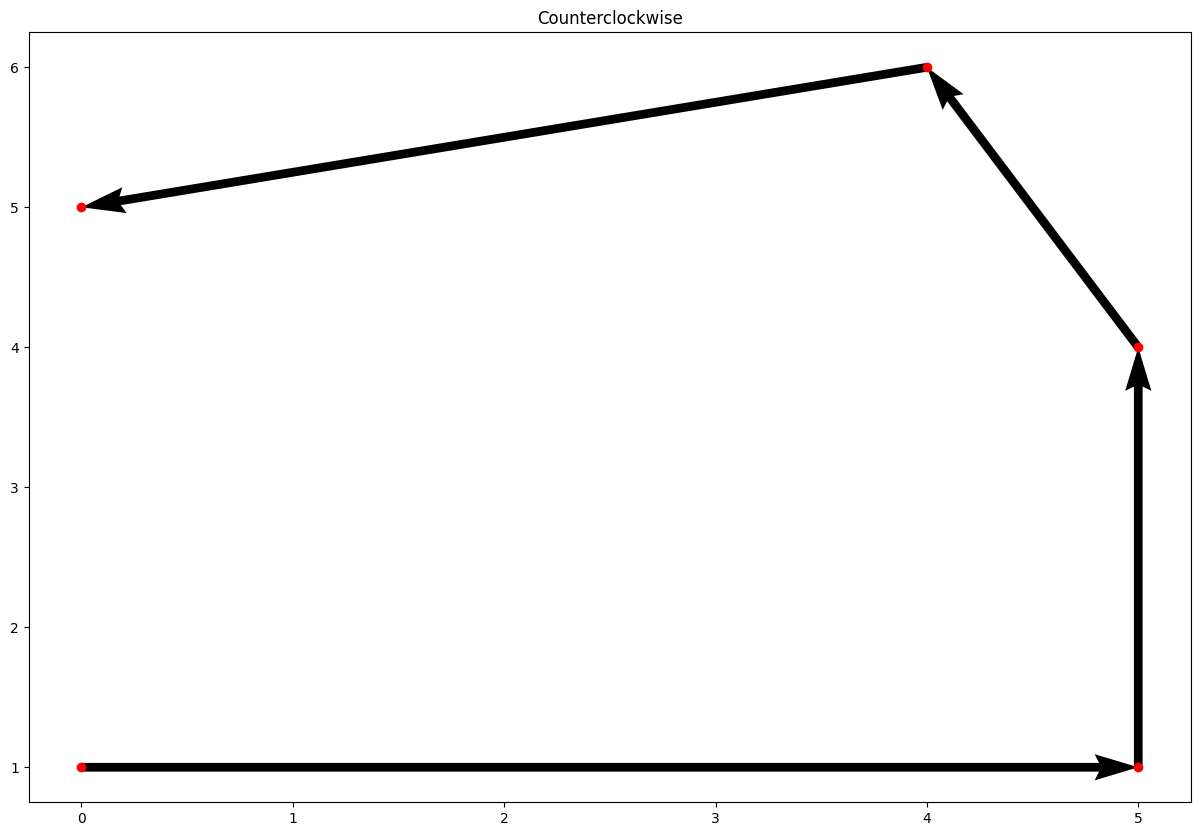

In [1103]:
a_coords = return_all_coords(5,0)
b_coords = return_all_coords(6,4)
c_coords = return_all_coords(4,5)
d_coords = return_all_coords(1,5)
e_coords = return_all_coords(1,0)

clockwise = is_clockwise([a_coords,
                         b_coords,
                         c_coords,
                         d_coords,
                         e_coords])
assert clockwise == False # counterclockwise

plot_clockwise([a_coords,
                b_coords,
                c_coords,
                d_coords,
                e_coords], clockwise)

clockwise -> negative


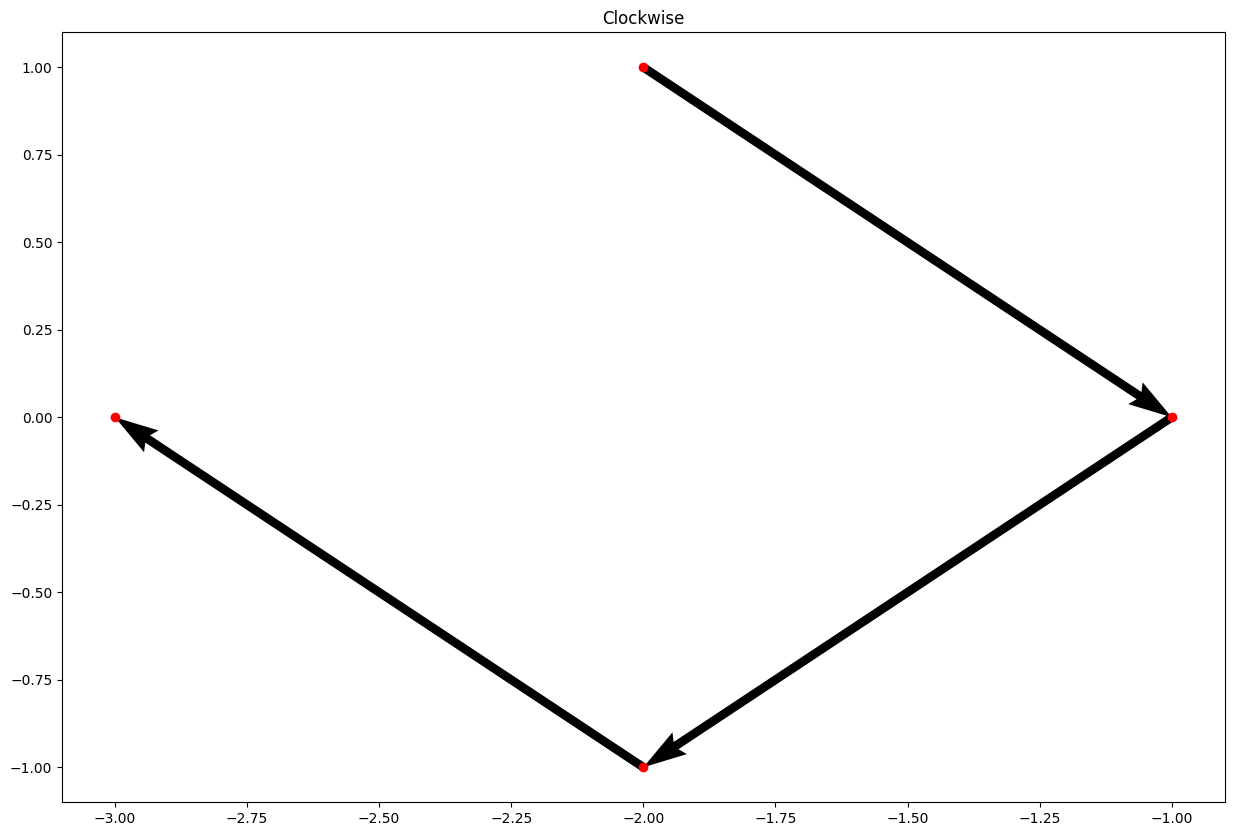

In [1104]:
a_coords = return_all_coords(0, -3)
b_coords = return_all_coords(-1, -2)
c_coords = return_all_coords(0, -1)
d_coords = return_all_coords(1, -2)

clockwise = is_clockwise([a_coords,
                         b_coords,
                         c_coords,
                         d_coords])
assert clockwise == True # clockwise

plot_clockwise([a_coords,
                b_coords,
                c_coords,
                d_coords], clockwise)

counterclockwise -> postive


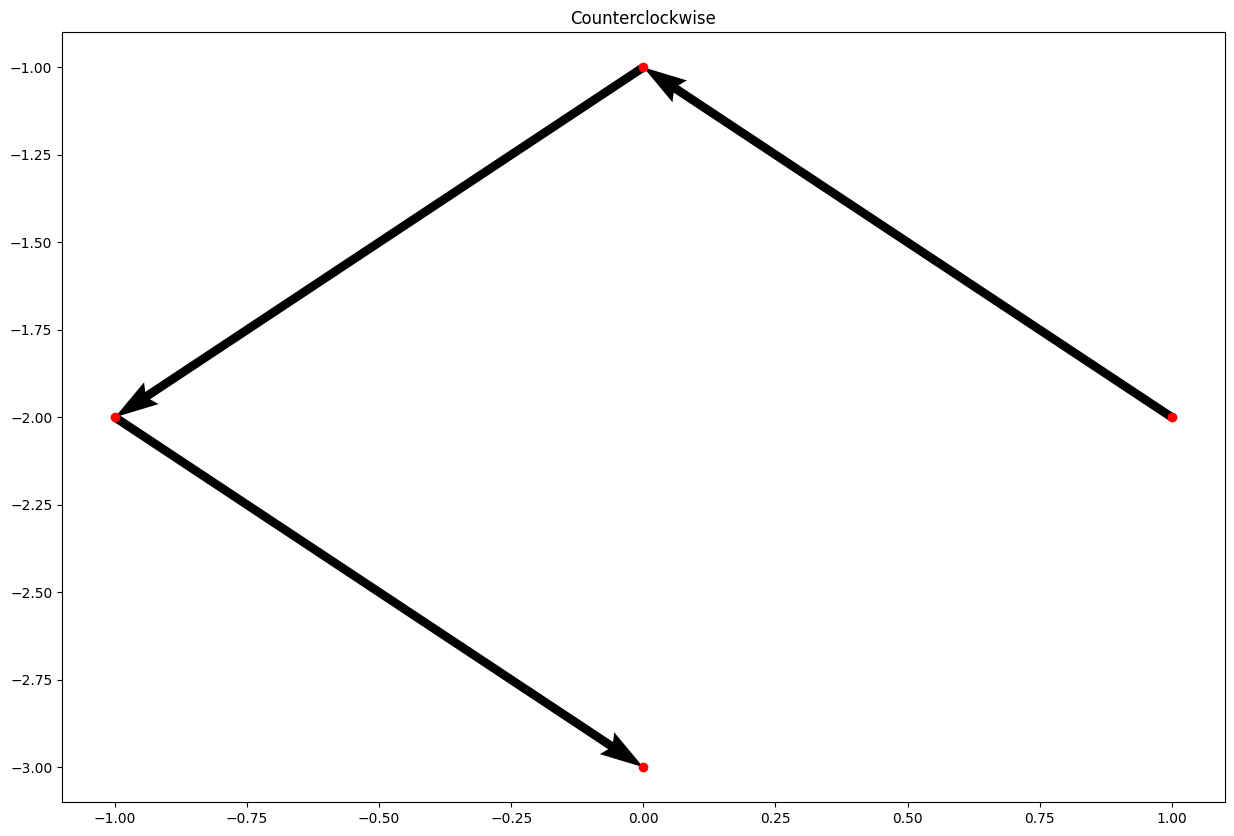

In [1105]:
a_coords = return_all_coords(-3, 0)
b_coords = return_all_coords(-2, -1)
c_coords = return_all_coords(-1, 0)
d_coords = return_all_coords(-2, 1)

clockwise = is_clockwise([a_coords,
                         b_coords,
                         c_coords,
                         d_coords])
assert clockwise == False # counterclockwise

plot_clockwise([a_coords,
                b_coords,
                c_coords,
                d_coords], clockwise)

counterclockwise -> postive


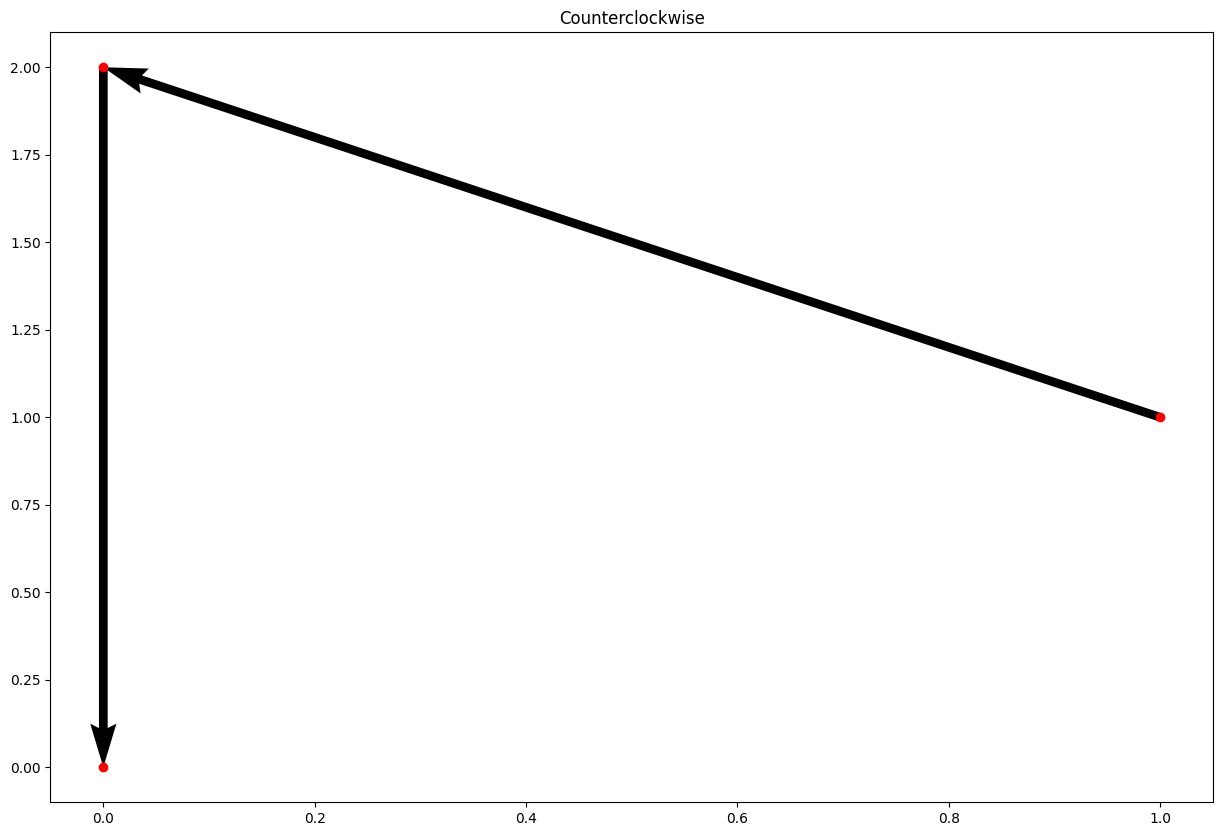

In [1106]:
lat = [0, 2, 1]
lon = [0, 0, 1]

a_coords = return_all_coords(0, 0)
b_coords = return_all_coords(2, 0)
c_coords = return_all_coords(1, 1)

clockwise = is_clockwise([a_coords,
                         b_coords,
                         c_coords])
assert clockwise == False # counterclockwise

plot_clockwise([a_coords,
                b_coords,
                c_coords], clockwise)

clockwise -> negative


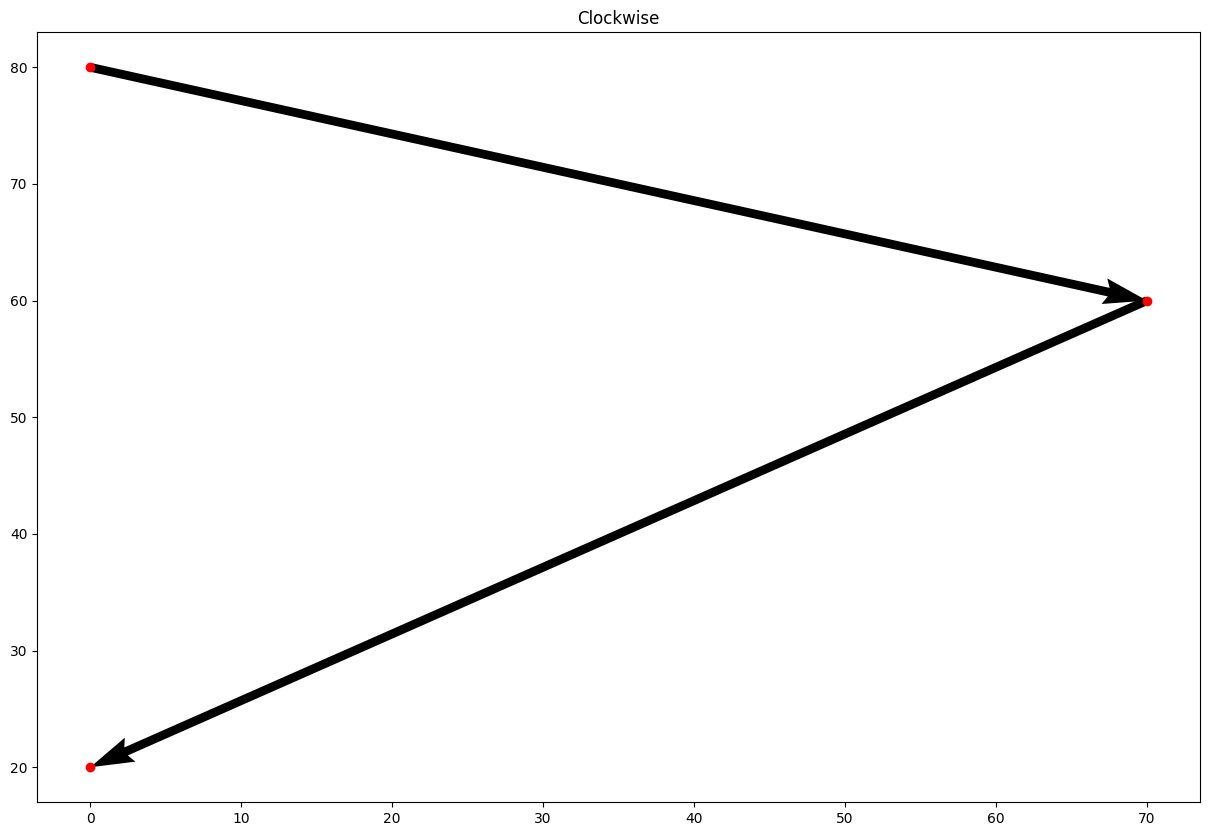

In [1107]:
lat = [20,60,80]
lon = [0,70, 0]

a_coords = return_all_coords(20, 0)
b_coords = return_all_coords(60, 70)
c_coords = return_all_coords(80, 0)

clockwise = is_clockwise([a_coords,
                         b_coords,
                         c_coords])
assert clockwise == True # clockwise

plot_clockwise([a_coords,
                b_coords,
                c_coords], clockwise)

counterclockwise -> postive


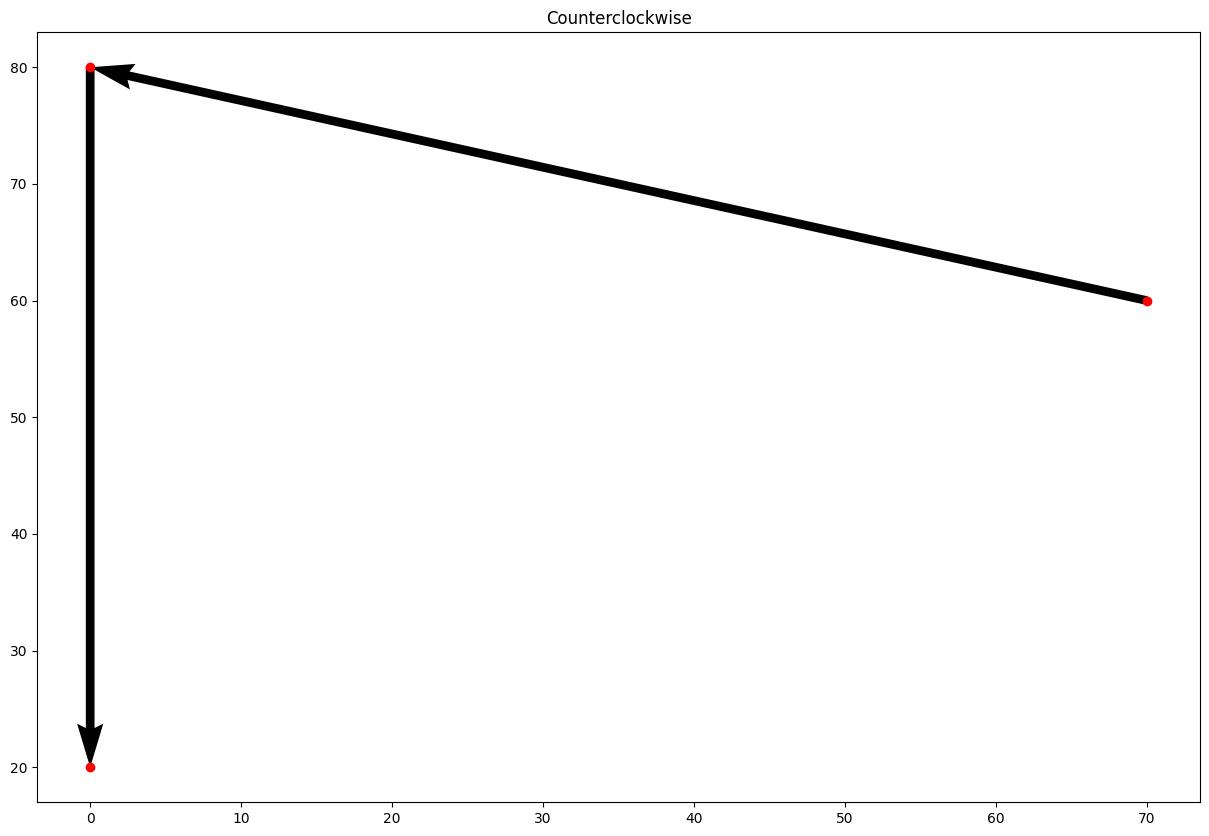

In [1108]:
lat = [20,80,60]
lon = [0,0,70]

a_coords = return_all_coords(20, 0)
b_coords = return_all_coords(80, 0)
c_coords = return_all_coords(60, 70)

clockwise = is_clockwise([a_coords,
                         b_coords,
                         c_coords])
assert clockwise == False # countterclockwise

plot_clockwise([a_coords,
                b_coords,
                c_coords], clockwise)

## gc_inout: Determines if a list of lat/lon specified points are inside or outside of spherical lat/lon polygon(s)

**Input**
- plat/plon: points that make up the polygon
- lat/lon: point to check if within the polygon

>  It is assumed that the polygons do not cross themselves and that the vertices can be contained in a hemisphere. If the polygons are not closed (that is, if the first listed vertex doesn't equal the last), then this function will close the polygon for you.
- Ensure polygon enclosed by last = first point

In [1109]:
# ray casting algorithm 
#https://www.youtube.com/watch?v=RSXM9bgqxJM
def plot_polygon_with_point(point_to_check=None,
                           polygon_points=None,
                           is_point_contained=None):
    fig,ax = plt.subplots(figsize=(15, 10))

   # plot polygon
    longitudes = [x["longitude"] for x in polygon_points] # longitude
    latitudes = [x["latitude"] for x in polygon_points] # latitude
    plt.plot(longitudes, latitudes, c="black")

    # plot point
    plt.scatter(point_to_check["longitude"], point_to_check["latitude"], c="red")

    plt.title(f"Is Point Contained withing Polygon = {is_point_contained}")
    plt.show()

In [1110]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

def polygon_contains_point(pt=None,
                           poly_pts=None):
    '''
    # ray casting algorithm
    # https://www.youtube.com/watch?v=RSXM9bgqxJM
    count = 0
    for i, edge in enumerate(poly_pts):
        if i + 1 < len(poly_pts):
            if pt["latitude"] < poly_pts[i]["latitude"]:
                inner = (pt["latitude"] - poly_pts[i]["latitude"]) / (poly_pts[i+1]["latitude"] - poly_pts[i]["latitude"])
                outer = pt["longitude"] + inner * (poly_pts[i+1]["longitude"] - poly_pts[i]["longitude"])
                if pt["longitude"] < outer:
                    count +=1 
    return count % 2 == 1
    # struggles on boundary conditions
    '''
    check_pt = Point((pt["longitude"], pt["latitude"]))
    longitudes = [x["longitude"] for x in poly_pts]
    latitudes = [x["latitude"] for x in poly_pts]
    lat_lon_coords = tuple(zip(longitudes, latitudes))
    polygon = Polygon(lat_lon_coords)
    contained_by_polygon = polygon.contains(check_pt)
    # check boundary conditions
    if not contained_by_polygon:
        # tolerance of 1 meter
        contained_by_polygon = polygon.buffer(distance=1/110000).contains(check_pt)
    return contained_by_polygon

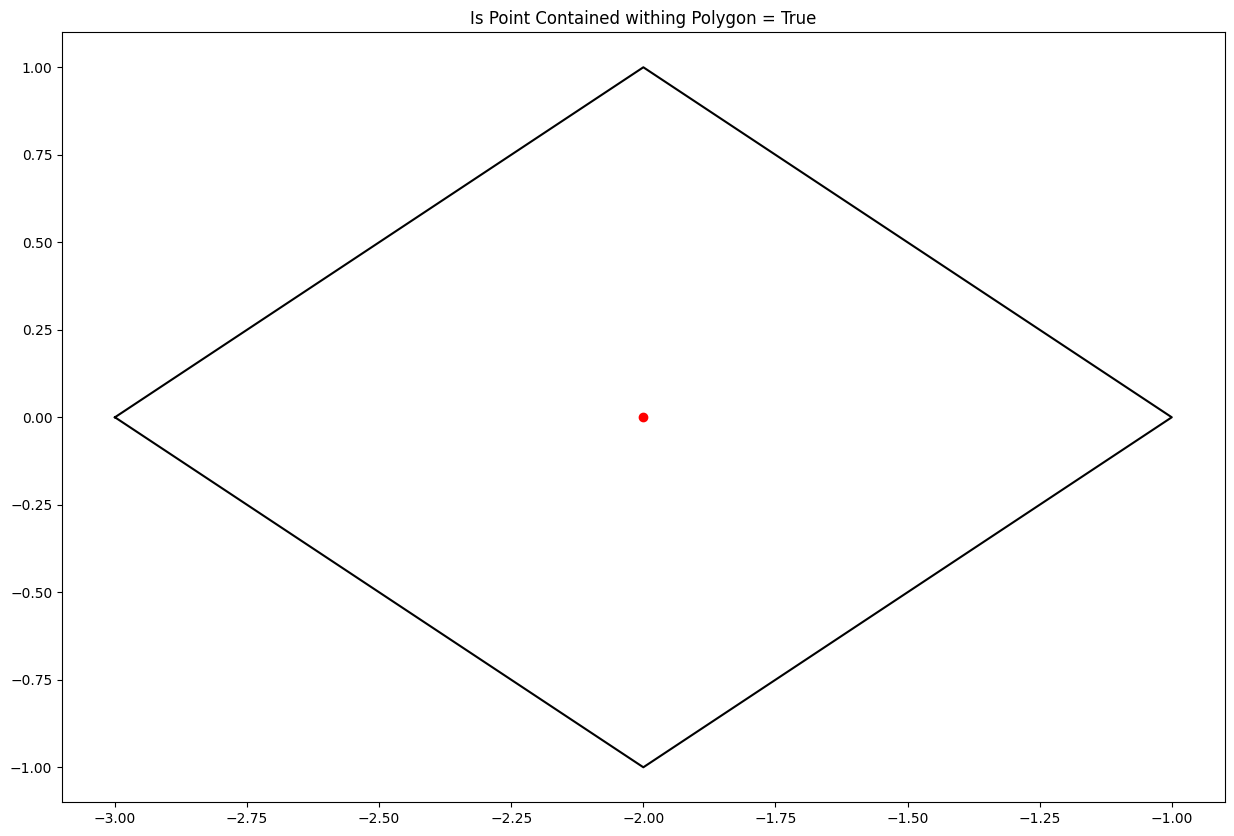

In [1111]:
# point at the center of a diamond

check_pt = return_all_coords(0, -2)
poly_pts = [return_all_coords(0, -3),
            return_all_coords(1, -2),
            return_all_coords(0, -1),
            return_all_coords(-1, -2),
            return_all_coords(0, -3)]

is_point_within_polygon = polygon_contains_point(check_pt, poly_pts)
assert is_point_within_polygon == True
plot_polygon_with_point(check_pt, poly_pts, is_point_within_polygon)

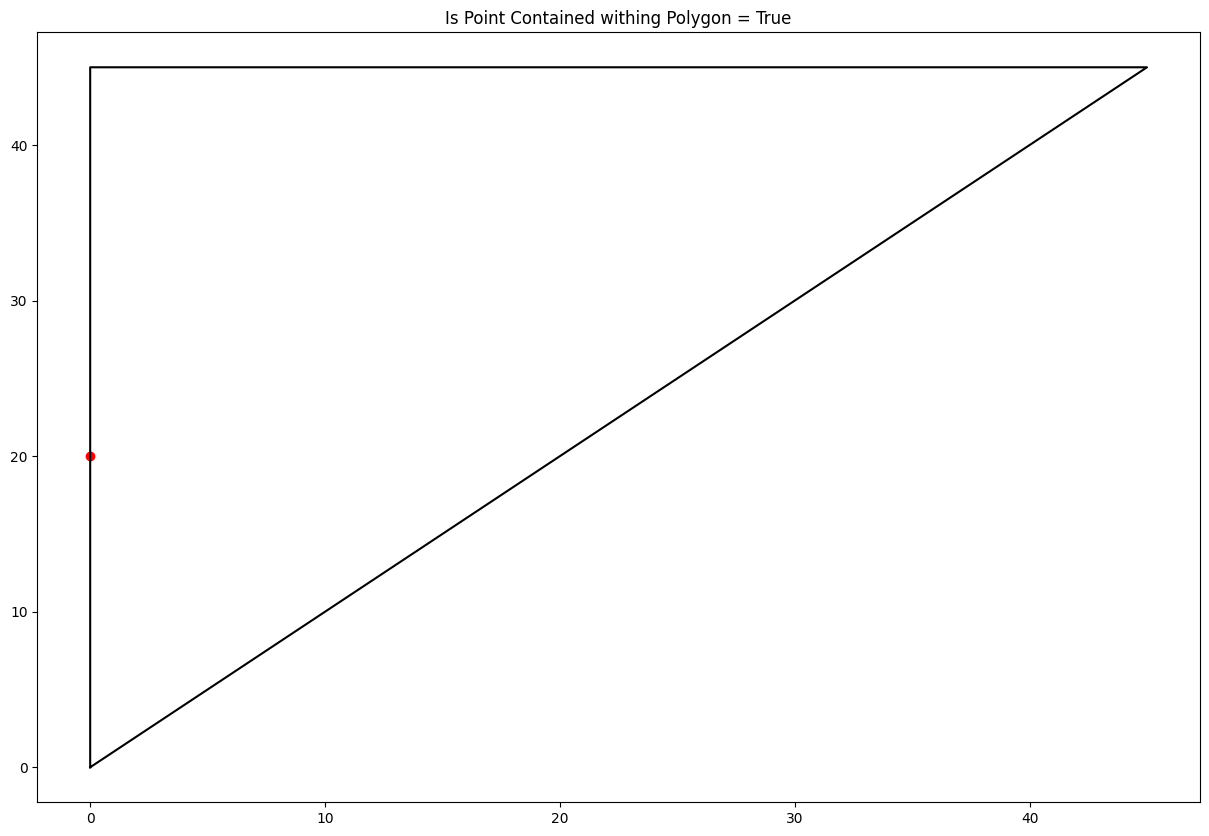

In [1112]:
# point on boundary arc

check_pt = return_all_coords(20, 0)
poly_pts = [return_all_coords(0, 0),
            return_all_coords(45, 45),
            return_all_coords(45, 0),
            return_all_coords(0, 0)]

is_point_within_polygon = polygon_contains_point(check_pt, poly_pts)
assert is_point_within_polygon == True
plot_polygon_with_point(check_pt, poly_pts, is_point_within_polygon)

#### TODO:
- Rework to check if multiple points are within a polygon, return an array of True/False

##  gc_qarea: Finds the area of a quadrilateral patch on the unit sphere & gc_tarea: Finds the area of a triangular patch on the unit sphere
**Input**
- Latitude/Longitude coordinates that make up the quadrilateral patch

Returns:
- Area of patch

In [1113]:
def area_of_polygon_projection(coords_pts=None):
    from pyproj import Geod
    longitudes = [x["longitude"] for x in poly_pts]
    latitudes = [x["latitude"] for x in poly_pts]
    geod = Geod(ellps="WGS84")
    poly_area_m, poly_perimeter = geod.polygon_area_perimeter(longitudes, latitudes)
    return abs(poly_area_m)  * 1e-6 # km^2

In [1114]:
# expects: 255049872 km^2
poly_pts = [return_all_coords(90, 0),
            return_all_coords(0, -90),
            return_all_coords(-90, 0),
            return_all_coords(0, 90)]

area_proj = area_of_polygon_projection(poly_pts)
print(f"{area_proj} km^2")
print(f"Roughly {(area_proj/509600000)*100:.2f}% of the Earth's Surface")
assert np.isclose(area_proj, 255049872, atol=20000)
assert np.isclose(area_proj/509600000, 1/2, atol=0.001) # roughly 50 the surface of the sphere

255032810.86204422 km^2
Roughly 50.05% of the Earth's Surface


In [1115]:
# eArea of Colorado: Roughyl 269603 km^2
poly_pts = [return_all_coords(41.0, -102.0248),
            return_all_coords(37.0, -102.0248),
            return_all_coords(37.0, -109.0248),
            return_all_coords(41.0, -109.0328)]

area_proj = area_of_polygon_projection(poly_pts)
print(f"{area_proj} km^2")
print(f"Roughly {(area_proj/509600000)*100:.2f}% of the Earth's Surface")
assert np.isclose(area_proj, 269603, atol=500)

269312.01487242494 km^2
Roughly 0.05% of the Earth's Surface


In [1116]:
# Area of Triangle Patch
poly_pts = [return_all_coords(0, 0),
            return_all_coords(0, 90),
            return_all_coords(90, 0)]

area_proj = area_of_polygon_projection(poly_pts)
print(f"{area_proj} km^2")
print(f"Roughly {(area_proj/509600000)*100:.2f}% of the Earth's Surface")
assert np.isclose(area_proj/509600000, 1/8, atol=0.001) # roughly 1/8th the surface of the sphere

63758202.715511054 km^2
Roughly 12.51% of the Earth's Surface
